## Heart Attack Prediction Model 
## Preliminary EDA, Additional EDA, Data Cleaning Stage 2

---


## Author: Will Wu

## Date: 2025-03-14
---


## Introduction
This notebook is organized into four main parts:
1. Preliminary Exploratory Data Analysis (EDA): I will perform an analysis of both the target and feature variables to understand their distributions and the correlations among them.
2. Additional Exploratory Data Analysis (EDA): Since some missing values remain, I will conduct further EDA on variables such as `height` and `weight`. This will involve examining their correlations with other features, including `sex` and `age_category`, and determining the most appropriate methods for imputing the missing values.
3. Implementation of Imputation Strategies: Based on insights gained from the Additional EDA section, I will apply corresponding measures to address the remaining features that contain missing values.
4. Final Cleaned Dataset: At the conclusion of this process, I will produce a fully cleaned dataset, ready for feature engineering and baseline modeling.

---

## **Table of Contents** ##
1. [Setup and Load Data](#1)
2. [Preliminary EDA](#2)
    - [Target Variable](#2a)
    - [Numeric Variables](#2b)
    - [Categorical Variables](#2c)
    - [Unique Advantages of This Project](#2d)
    - [Summary](#2e)

3.  [Additional EDA: Addressing Missing Values](#3)
    - [height](#3a)
    - [weight](#3b)
    - [physical_health_days](#3c)
    - [pneumo_vax and flu_vax](#3d)
    - [Summary of Missing Values Solutions](#3e)

4. [Data Cleaning - Stage 2](#4)
    - [height](#4a)
    - [weight](#4b)
    - [bmi](#4c)
    - [physical_health_days](#4d)
    - [pneumo_vax and flu_vax](#4e)
    - [Data Quality Check](#4f)

5. [Export](#5)

---

## 1. Setup and Loading<a class="anchor" id="1"></a>

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure Seaborn to use 'darkgrid' as the default background style
sns.set_style('darkgrid')

# Create a default palette
palette = sns.color_palette("muted")

# Setting figure size, fontsize globally in the notebook
plt.rcParams["figure.figsize"] = (6.0, 6.0)


In [3]:
# Load the data
heart_attack_clean = pd.read_csv("../data/processed/heart_attack_clean_stage1.csv")

In [4]:
# Peek random 5 rows
heart_attack_clean.sample(5).T

,154905,334367,429540,174715,698847
year,2022,2022,2023,2022,2023
sex,Male,Male,Male,Female,Female
race_ethnicity_category,White,White,White,Asian,White
age_category,50-54,40-44,80+,30-34,35-39
state,Massachusetts,Washington,Florida,Minnesota,Virginia
height,1.75,1.78,1.8,1.65,1.65
weight,62.6,119.29,85.73,58.97,68.49
bmi,20.44,37.65,26.46,21.66,25.16
alcohol_drinkers,No,No,No,No,Yes
general_health,Poor,Good,Very good,Excellent,Very good


---

## 2. Preliminary EDA <a class="anchor" id="2"></a>

In this preliminary EDA section, I will break down the analysis into five parts:

1. Distribution of the target variable had_heart_attack.
2. Distribution of numeric variables and how these distributions differ between respondents who had a heart attack and those who did not.
3. Distribution of categorical variables and how these distributions differ for respondents who had a heart attack versus those who did not.
4. Based on the EDA findings, I will demonstrate how my model differs from existing models.
5. Summary of findings in this section.
---

### 2.1 Target Variable <a class="anchor" id="2a"></a>

First I will check the distribuiton of target variable `had_heart_attack`.

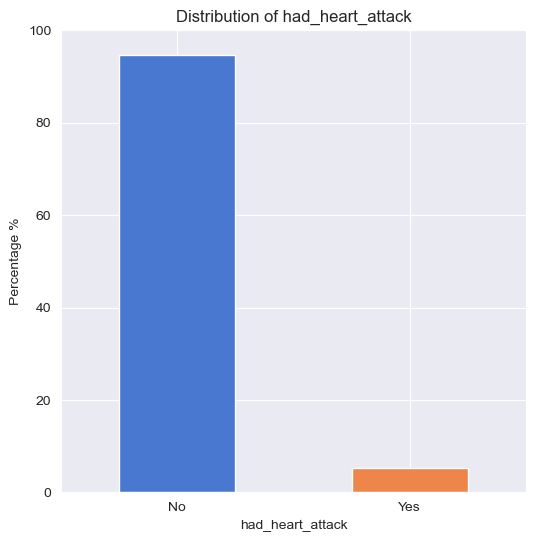

                   Count  Percentage
had_heart_attack                    
No                712316       94.72
Yes                39683        5.28


In [5]:
# Create a table showing the percentage of each category in had_heart_attack
had_heart_attack_dist = pd.DataFrame({
    'Count' : (heart_attack_clean['had_heart_attack'].value_counts()),
    'Percentage' : (heart_attack_clean['had_heart_attack'].value_counts(normalize=True) * 100).round(2)
})


# Draw the count plot in displayed in percentage
plt.figure(figsize=(6, 6))
had_heart_attack_dist['Percentage'].plot(kind='bar', color=palette)

plt.title('Distribution of had_heart_attack')
plt.ylabel('Percentage %')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

print(had_heart_attack_dist)



**Takeaways:**
- The distribution of target variable `had_heart_attack` is highly imbalanced, with only 5.28% of respondents having experienced a heart attack.
- An uninformative model that always predicts 'No' for the `had_heart_attack` outcome can achieve an accuracy score of 94.72%. Therefore, model evaluation metrics should not rely solely on accuracy.
- Various techniques for addressing the imbalanced target variable should be explored during the modeling stage.

---

### 2.2 Numeric Variables <a class="anchor" id="2b"></a>

In this part, I will: 
- Plot a histogram for each numeric varible to examine its distribution.
- Use overlapping histograms to visualize distrubutions of each feature for individuals who had a heart attack vs who did not.
- Create a correlation heatmap to check the linear correlation among numeric variables.

Since `year` only stores the year when the observation is recorded, it does not have anything to do with the target variable, and should be excluded from EDA.

In [6]:
# Retrieve numeric columns
num_cols = heart_attack_clean.select_dtypes(include='number').columns.tolist()

# Exclude year
num_cols.remove('year')

num_cols

['height', 'weight', 'bmi', 'physical_health_days', 'mental_health_days']

In [7]:
# Subsetting the dataset into subsets with values of Yes and No had_heart_attack
heart_attack_yes = heart_attack_clean[heart_attack_clean['had_heart_attack'] == 'Yes']
heart_attack_no = heart_attack_clean[heart_attack_clean['had_heart_attack'] == 'No']

Create the histograms:

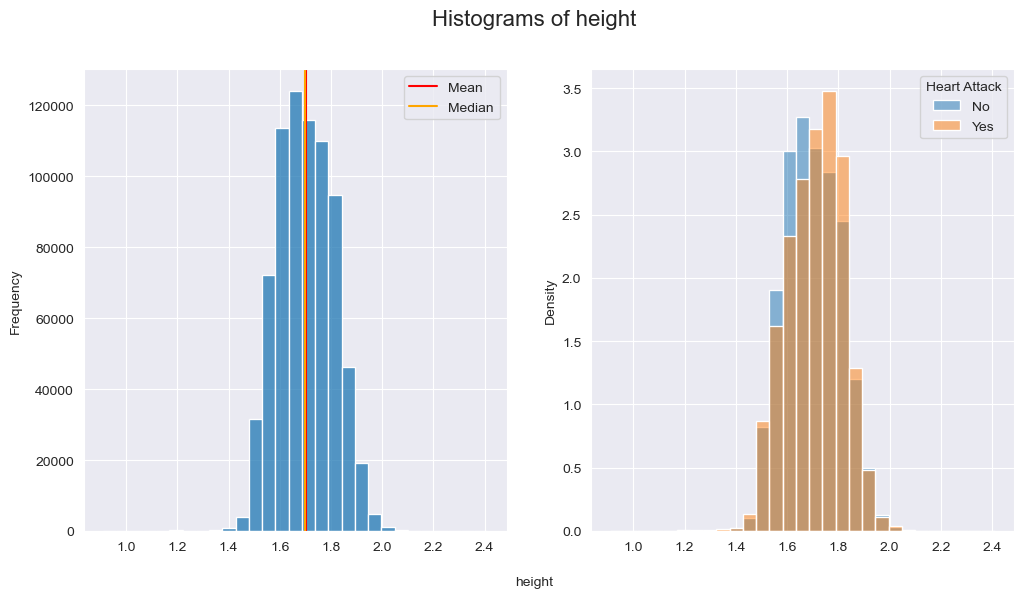

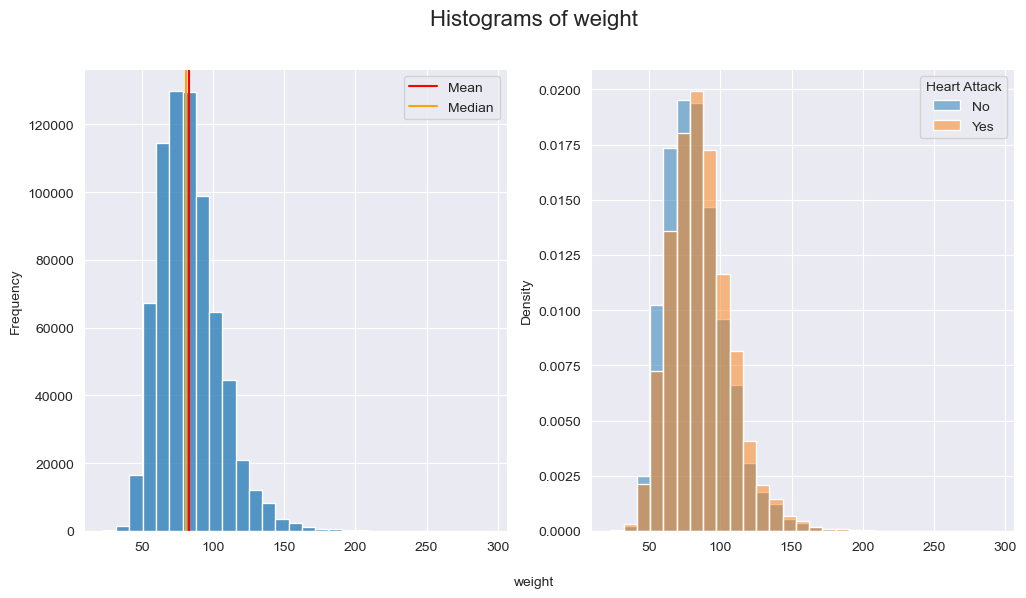

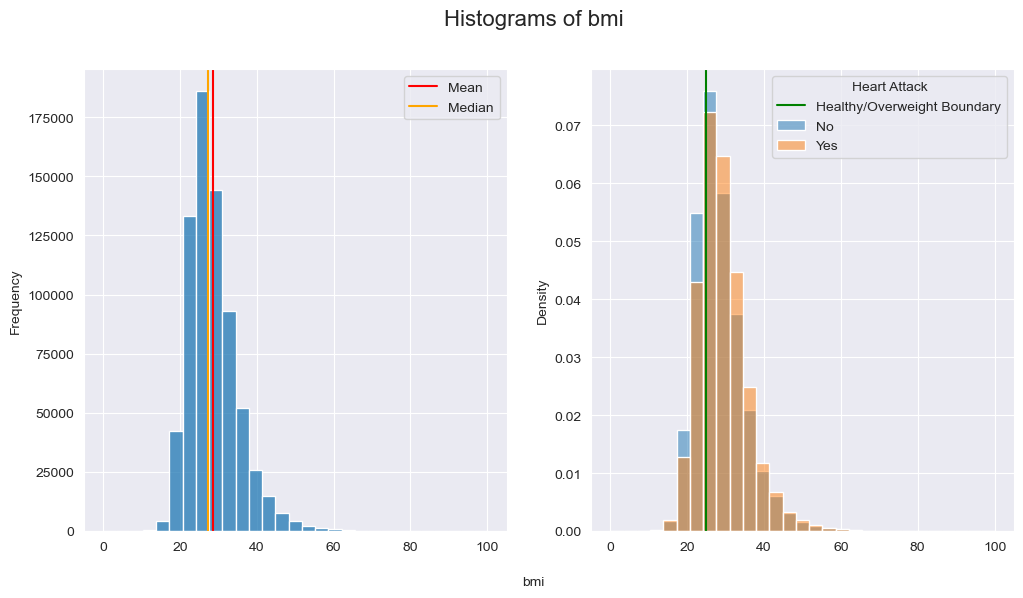

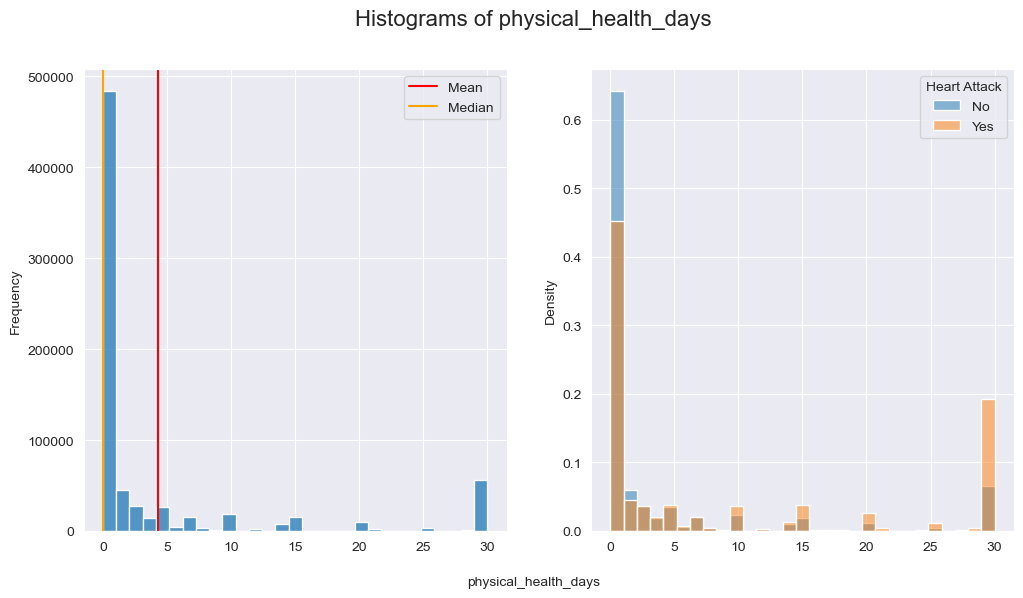

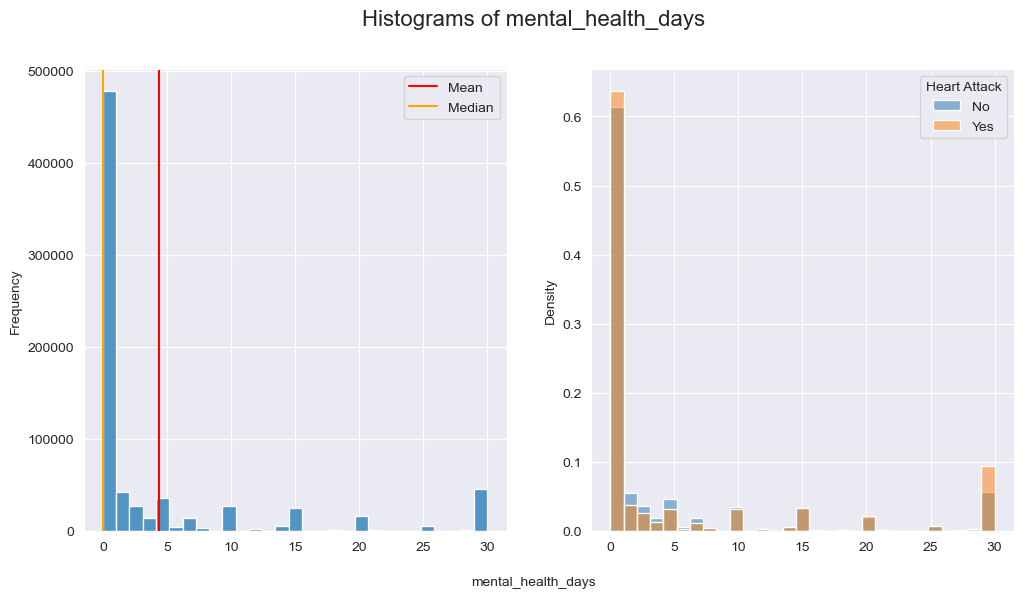

In [8]:
# Create a for loop that iterates every numeric column
for col in num_cols: 

    # Instantiate subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Customize bin range and add one vertical line if col is bmi
    if col == 'bmi': 
        bins = np.linspace(0,100, 30)
        ax[1].axvline(x=25, color='green', label='Healthy/Overweight Boundary')
    else:
        # Use the same bins to ensure alignment
        bins = np.linspace(heart_attack_clean[col].min(), heart_attack_clean[col].max(), 30)


    # First histogram: plot using whole dataset
    sns.histplot(heart_attack_clean[col], bins=bins, ax=ax[0])
    ax[0].axvline(x=heart_attack_clean[col].mean(), color='red', label='Mean')
    ax[0].axvline(x=heart_attack_clean[col].median(), color='orange', label='Median')
    ax
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Frequency')
    ax[0].legend()

    # Second plot: overlapping histograms disginguished by had_heart_attack
    sns.histplot(heart_attack_no[col], bins=bins, stat='density', alpha=0.5, label='No', ax=ax[1])
    sns.histplot(heart_attack_yes[col], bins=bins, stat='density', alpha=0.5, label='Yes', ax=ax[1])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Density')
    ax[1].legend(title='Heart Attack')

    # Set properties that share titles and xlabes
    fig.suptitle(f'Histograms of {col}', fontsize=16)
    fig.text(0.5, 0.02, col, ha='center')

    plt.show()

**Takeaways**:
 `height`:
- Left: **two bars exhibit high frequencies**, likely influenced by the `sex` variable. Further investigation is required to identify the most appropriate method for imputing the missing values.
- Right: Respondents who **did not** experience a heart attack are more concentrated between **heights 1.55 - 1.7 meters**, while those who **did have a heart attack** cluster between **1.7 - 1.9 meters**. This suggests that height may have an effect on the likelihood of experiencing a heart attack, or it could just be a confounding variable.

<br>

`weight`:
- Left: The distribution is approximately normal with outliers on right tail.
- Right: Respondents who **did not** experience a heart attack are more concentrated at weights **between 50 and 80 kilograms**, while those who **did have a heart attack** cluster **between 90 to 150 kilos**. This suggests that weight may have an effect on the likelihood of experiencing a heart attack.

<br>

 `bmi`:
- Interpretation of BMI ranges:
    - under 18.4: underweight
    - between 18.5 and 24.9: healthy. 
    - between 25 and 29.9: overweight. 
    - 30 or over: obese
- Left: The distribution is approximately normal.
- Right: **`bmi` has an obvious correlation with target variable. The Green line is the boundary line cutting people into'Healthy' and 'Overweight' group, and we can clearly tell that people who are 'Underweight' and 'Healthy' are less likely to have a heart attack while those who are 'Overweright', 'Obese', or 'Extreme Obese'.**
<br>
- Feature engineering opportunity: After data cleaning, I can create a new feature and categorize respondents into different body health groups instead of using bmi in numbers.

<br>

`physical_health_days`:
- Left: A significant number of respondents report 0 days of either physical or mental health issues, with a smaller proportion of observations extending far to the right of 30 days.
- Right: respondents with **0 poor physical health days have a lower heart attack frequency**, while those with all **30 days report a higher proportion** of heart attacks.

<br>

`mental_health_days`:
- Left: The distribution exhibit a very similar pattern compared to `physical_health_days`. The correlation between these two variables can be further investigated, and might help imputing missing values. 
- Right: Unlike the partterns discovered from `physical_health_days`, respondents with **both 0 and 30 poor mental health days** all had a **higher frequency in getting a heart attack**.
---

#### Pairplot + Correlation Heatmap

<Figure size 1000x1000 with 0 Axes>

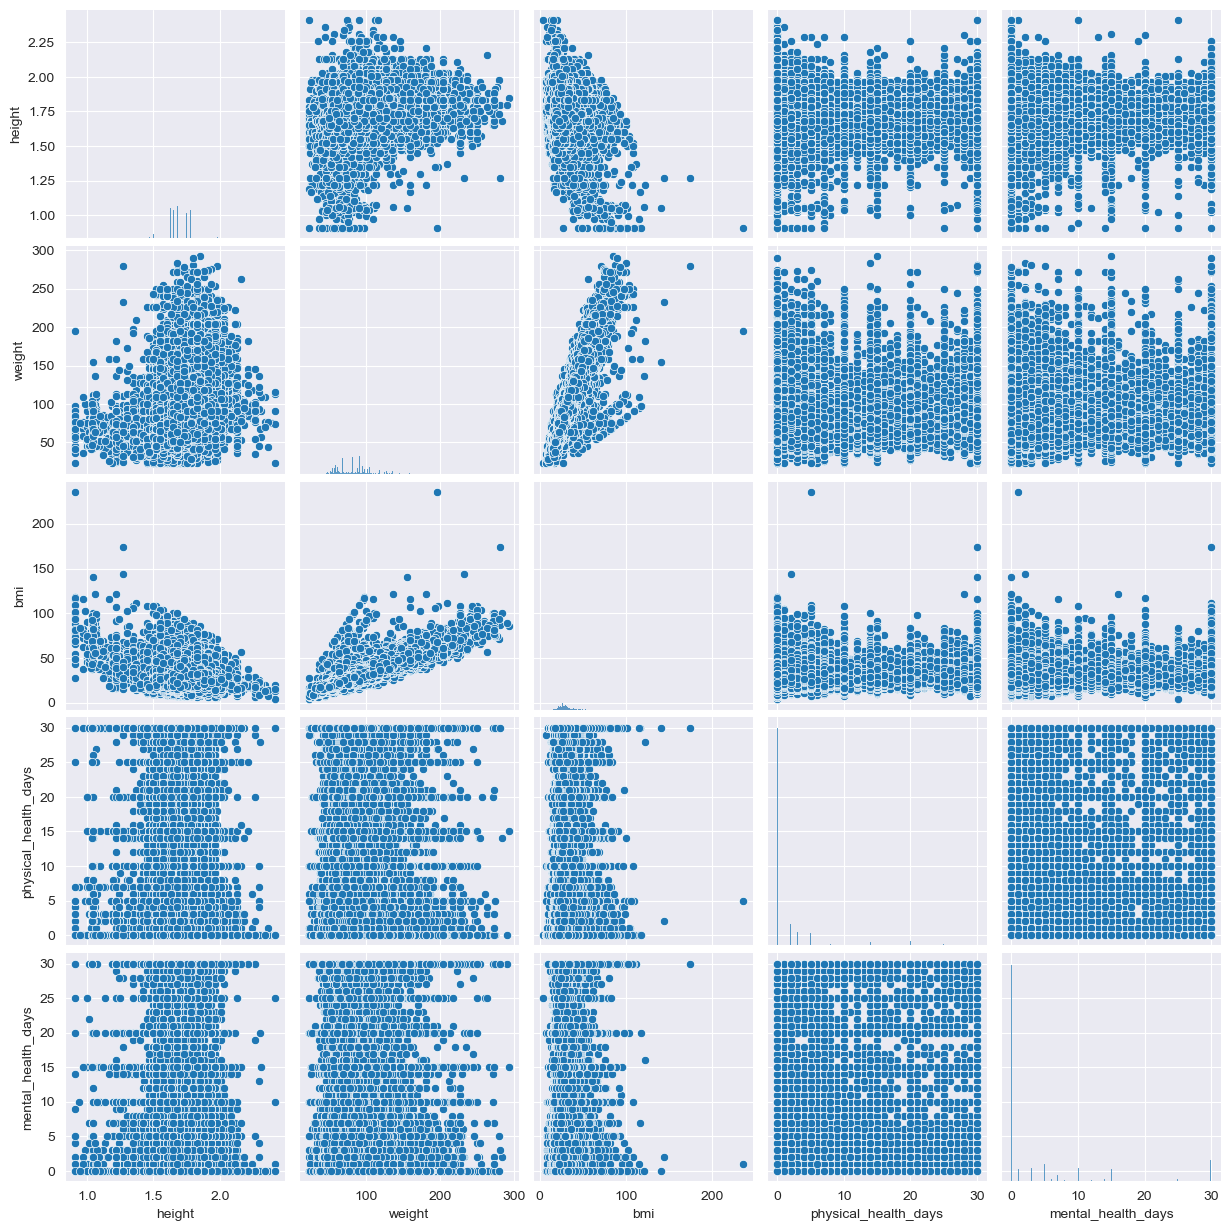

In [9]:
# Create a pairlplot of numeric varaibles
plt.figure(figsize=(10, 10))
sns.pairplot(heart_attack_clean[num_cols])

plt.show()

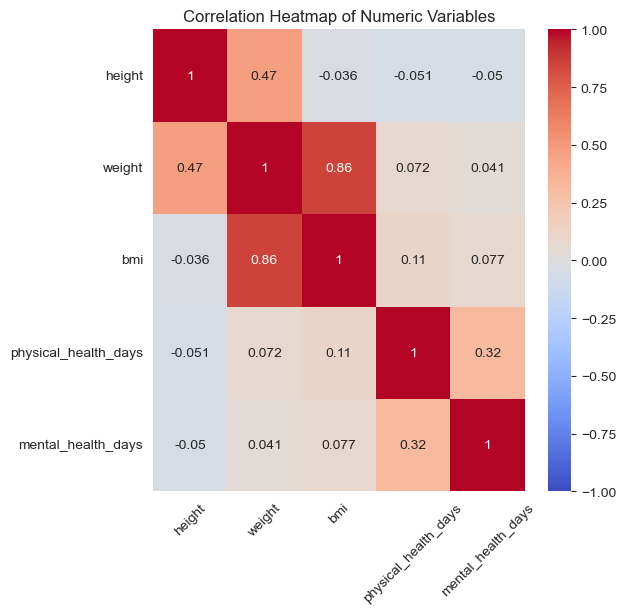

In [10]:
# Create a heatmap of correlation matrix
sns.heatmap(heart_attack_clean[num_cols].corr(),
            vmin=-1,
            vmax=1, 
            annot=True, 
            cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.xticks(rotation=45)
plt.show()

**Takeaways**:
- A Strong linear correlation relationship between `bmi` and `height`, which is mainly caused by the formula $\text{BMI} = \frac{\text{weight (kg)}}{(\text{height (m)})^2}$.
- A moderate positive linear correlation can be detected between `height` and `weight`.
- The correlation between `physical_health_days` and `mental_health_days` is 0.32, indicating a weak linear relationship that contradicts previous assumptions. Therefore, `mental_health_days` is not suitable for imputing missing values in `physical_health_days`.

---

### 2.3 Categorical Variables <a class="anchor" id="2c"></a>

- I will use a for loop to iterate over each categorical variable. For each categorical column:
    - Create a bar plot to examine the distribution across categories (percentage of each category).
    - Generate a bar plot illustrating the likelihood of having a heart attack across different categories within each feature. The likelihood is calculated by the percentage of respondents who reported having a heart attack within each category. For instance, if 3% of females reported having a heart attack, it translates to a 3% probability of females having a heart attack.

- `state` has over 50 unique values, so plotting all categories on a single plot will make the bars too clustered and difficult to visulize. Instead, I will create plots for `state` separately.
- `had_heart_attack` is the target variable and has already been analyzed previously, so I will exclude it from this part.

In [11]:
# Retrieve numeric columns
cat_cols = heart_attack_clean.select_dtypes(include='object').columns.tolist()

# Exlucde state and had_heart_attack
cat_cols

['sex',
 'race_ethnicity_category',
 'age_category',
 'state',
 'alcohol_drinkers',
 'general_health',
 'smoker_status',
 'e_cigarette_usage',
 'physical_activities',
 'stress_levels',
 'had_angina',
 'had_stroke',
 'had_asthma',
 'had_skin_cancer',
 'had_copd',
 'had_diabetes',
 'had_kidney_disease',
 'had_depressive_disorder',
 'had_arthritis',
 'deaf_or_hard_of_hearing',
 'blind_or_vision_difficulty',
 'difficulty_walking',
 'difficulty_concentrating',
 'difficulty_dressing_bathing',
 'difficulty_errands',
 'last_checkup_time',
 'chest_scan',
 'flu_vax',
 'tetanus_vax',
 'pneumo_vax',
 'had_heart_attack']

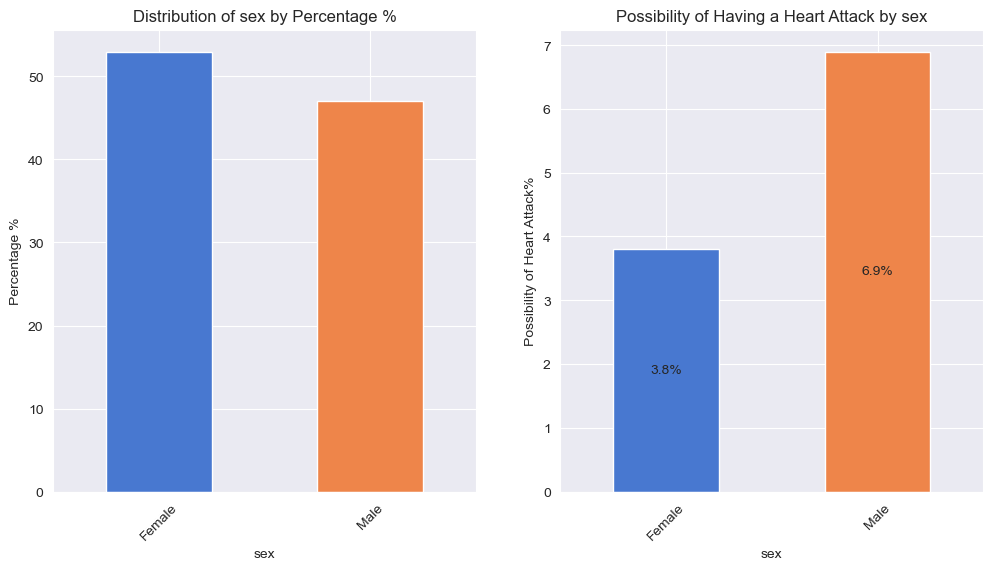

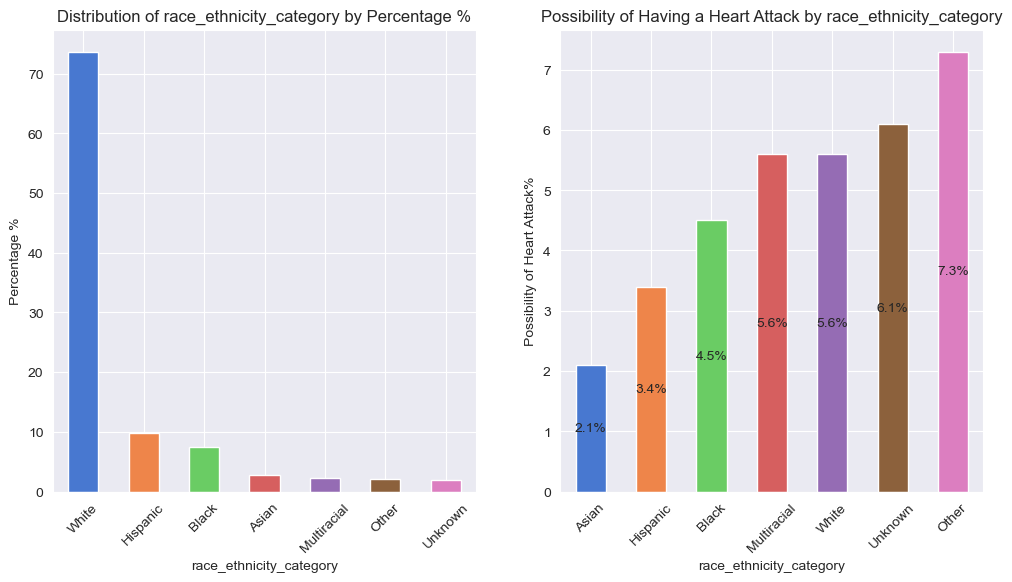

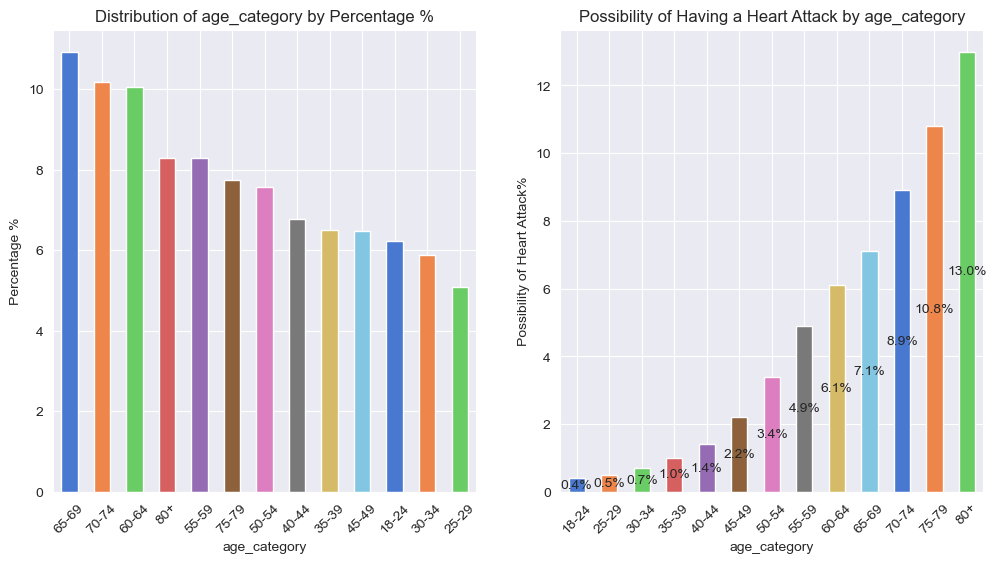

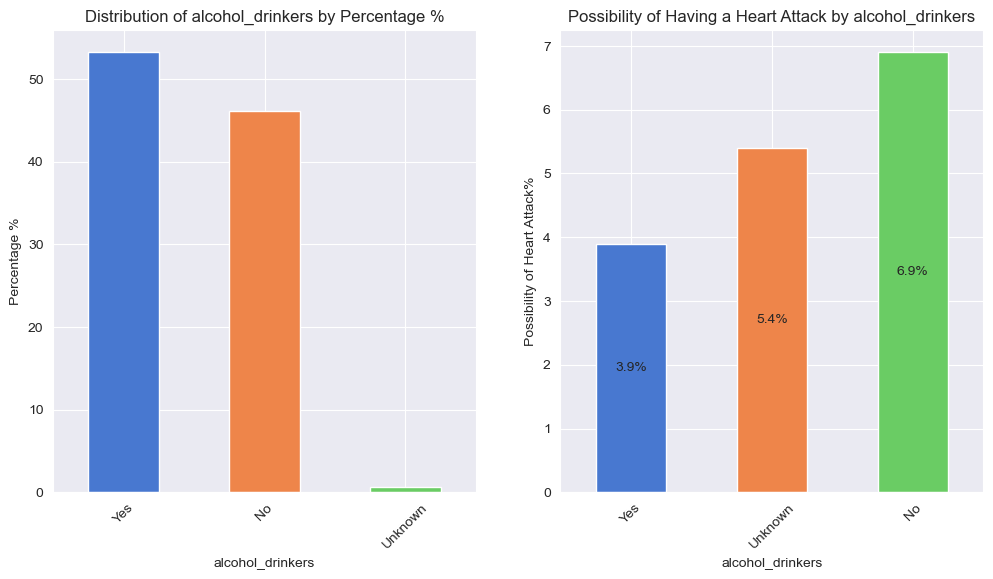

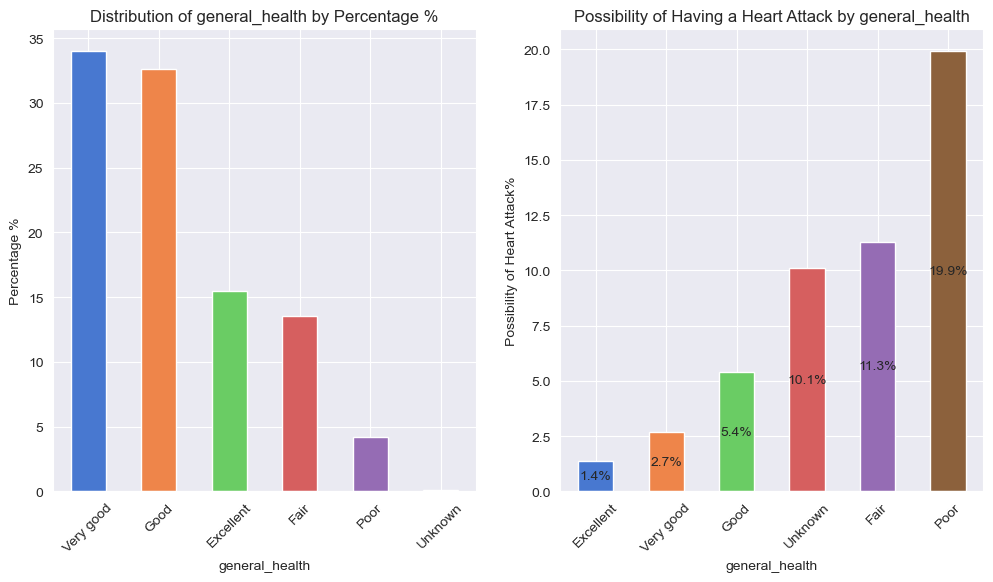

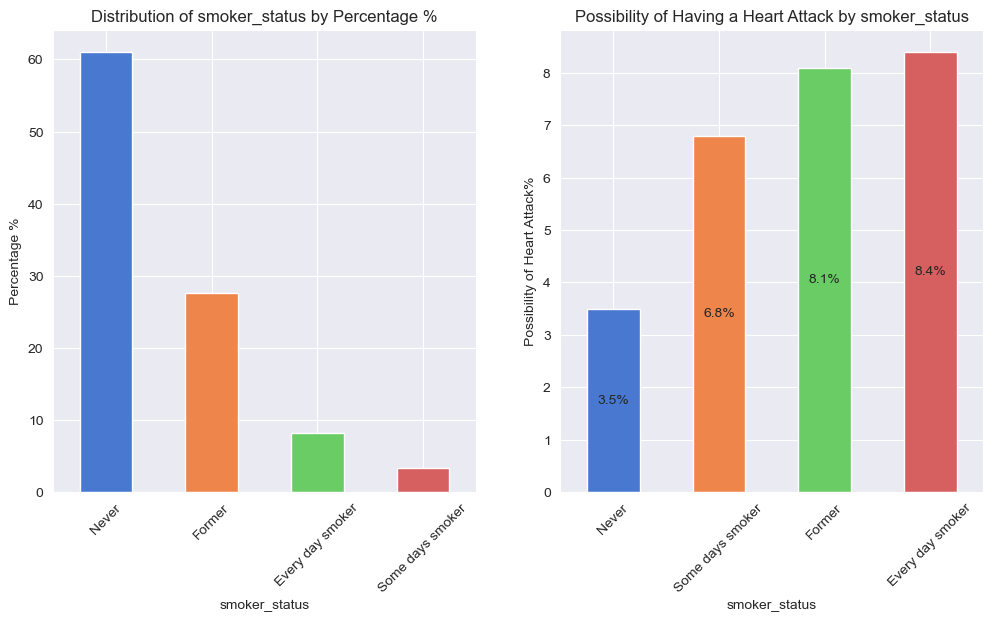

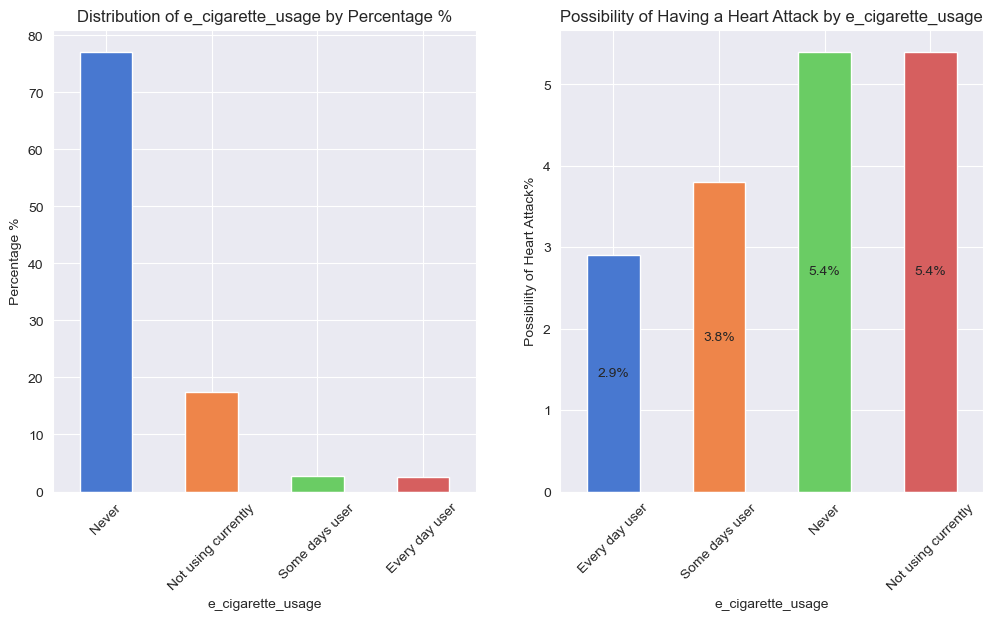

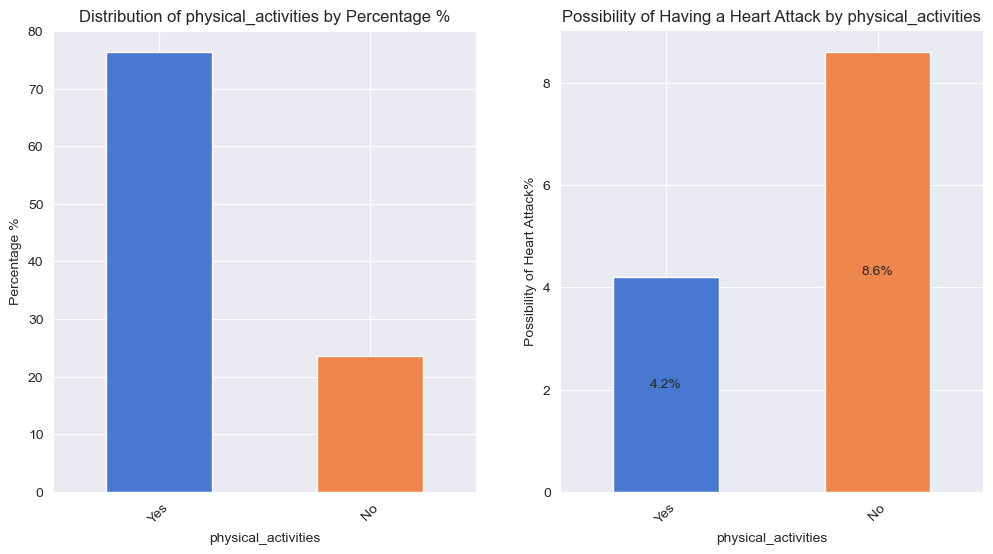

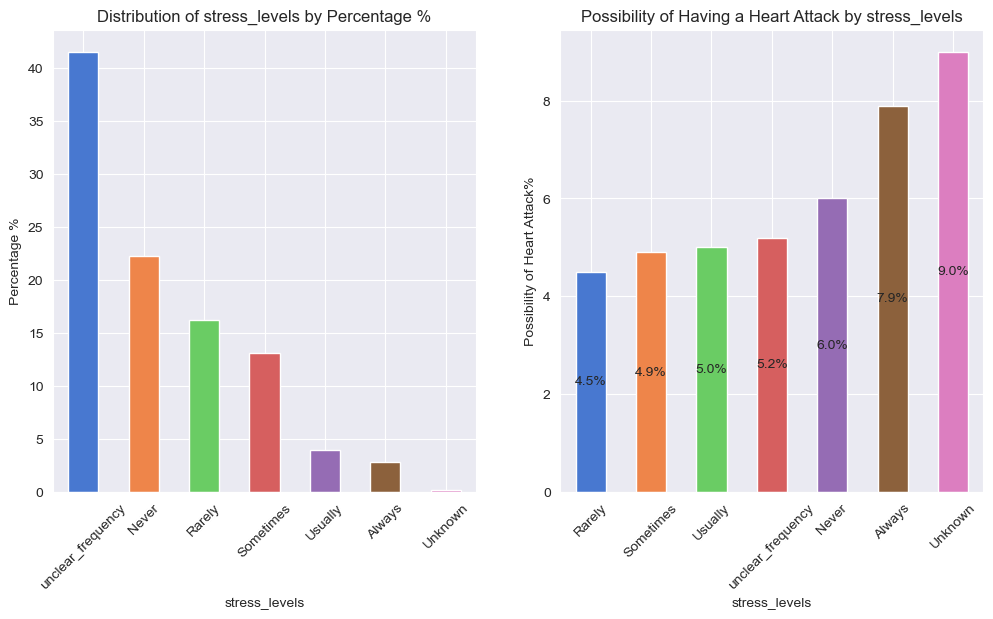

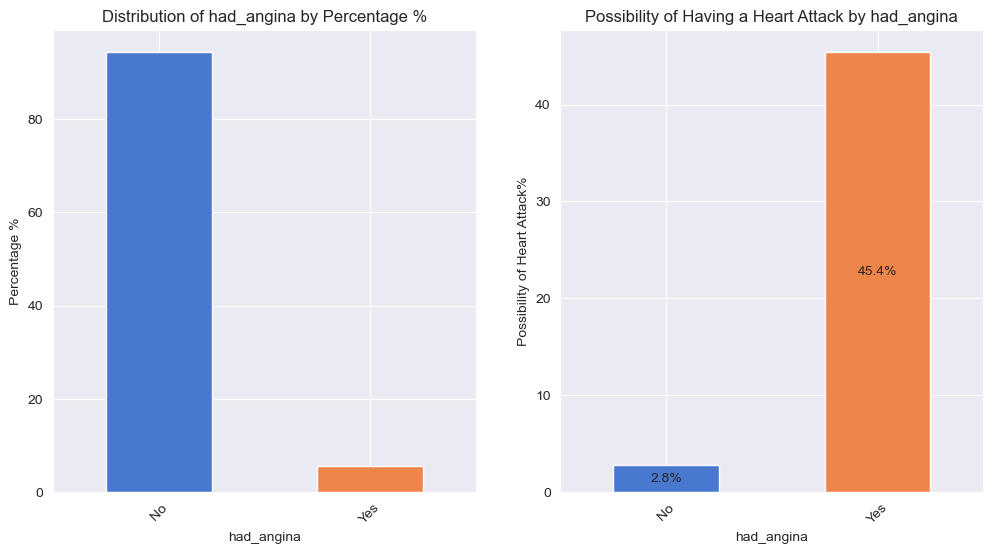

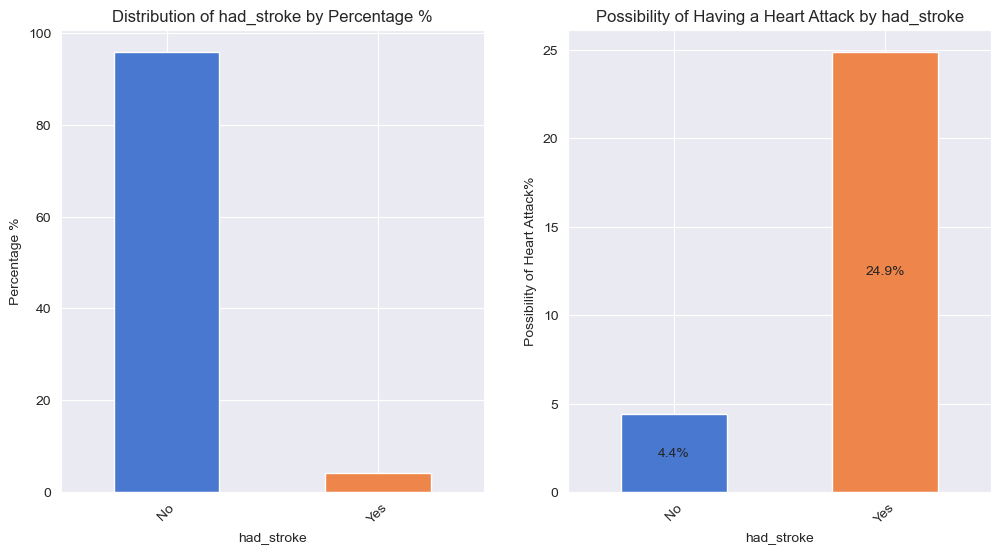

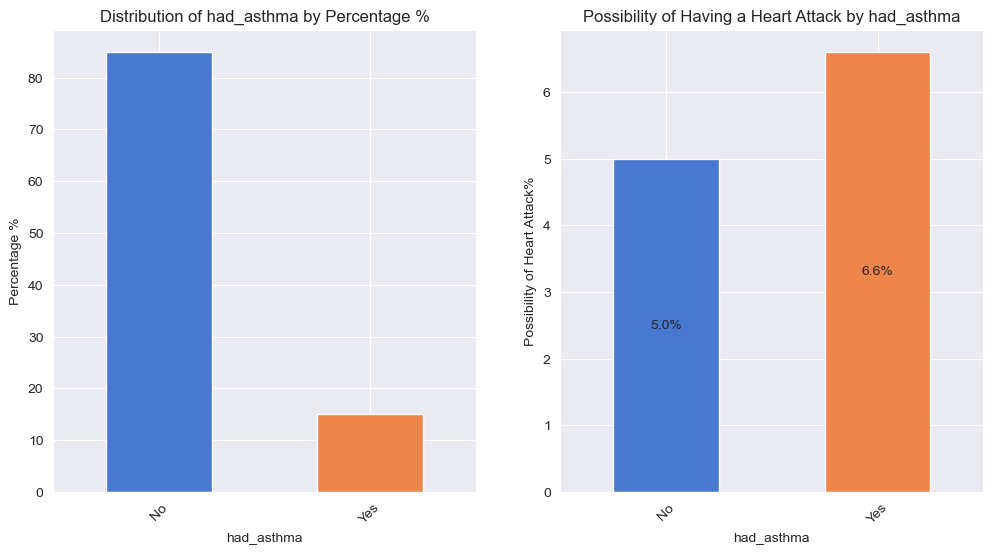

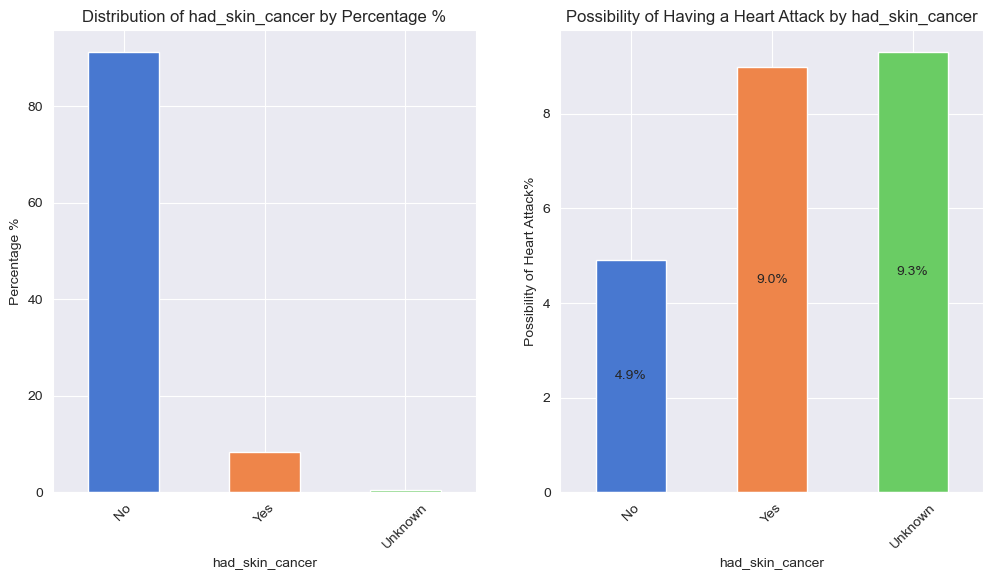

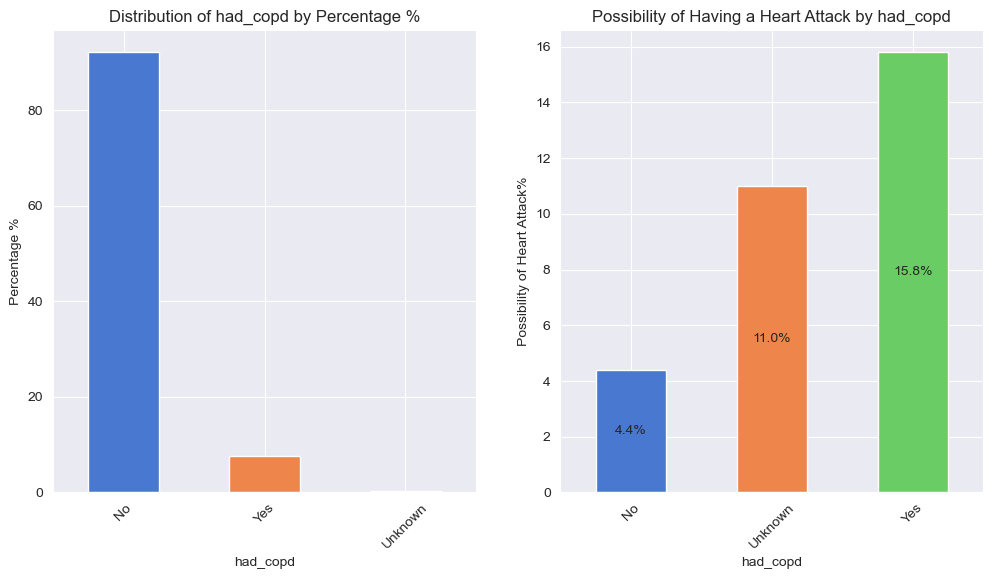

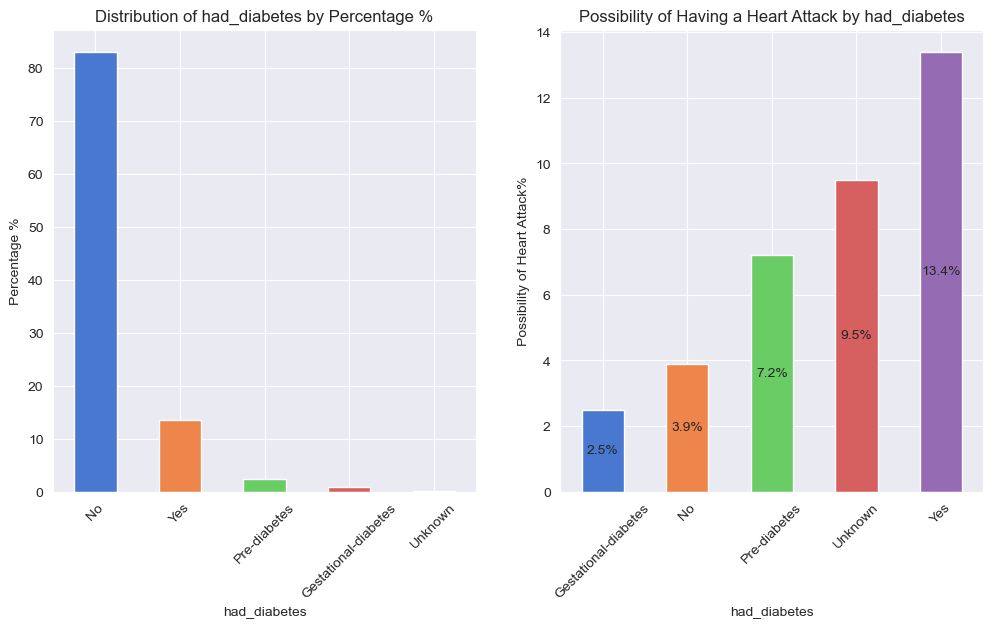

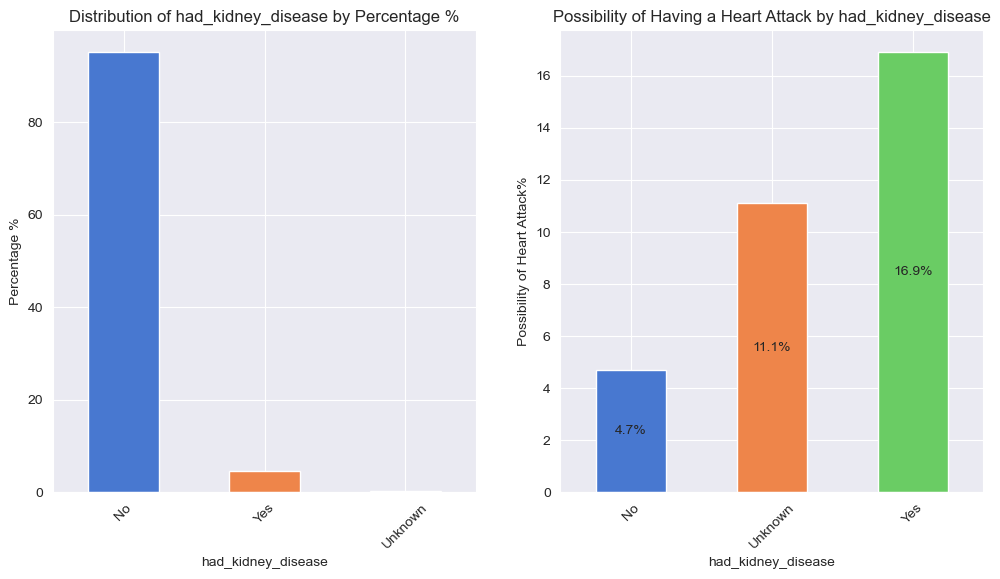

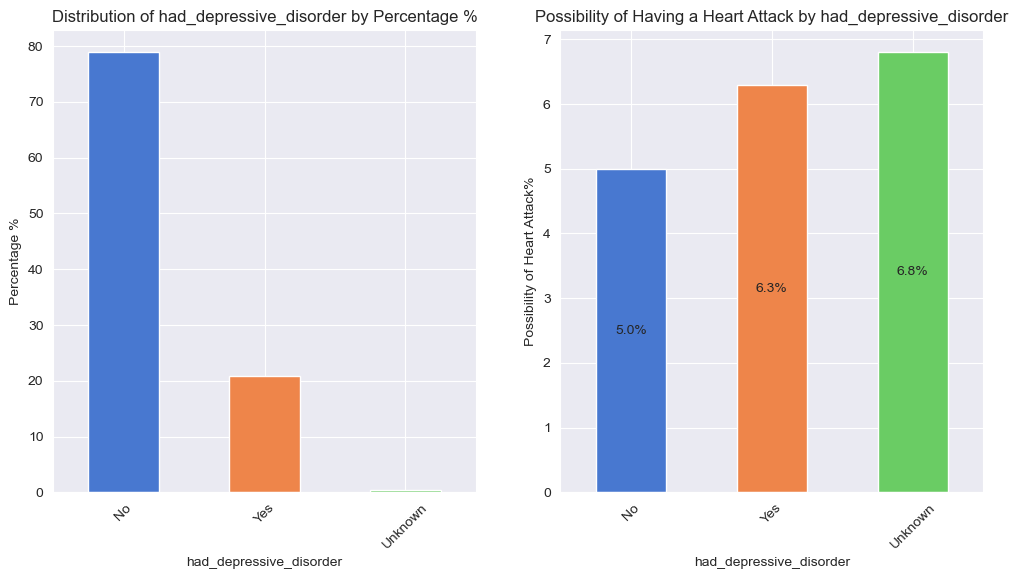

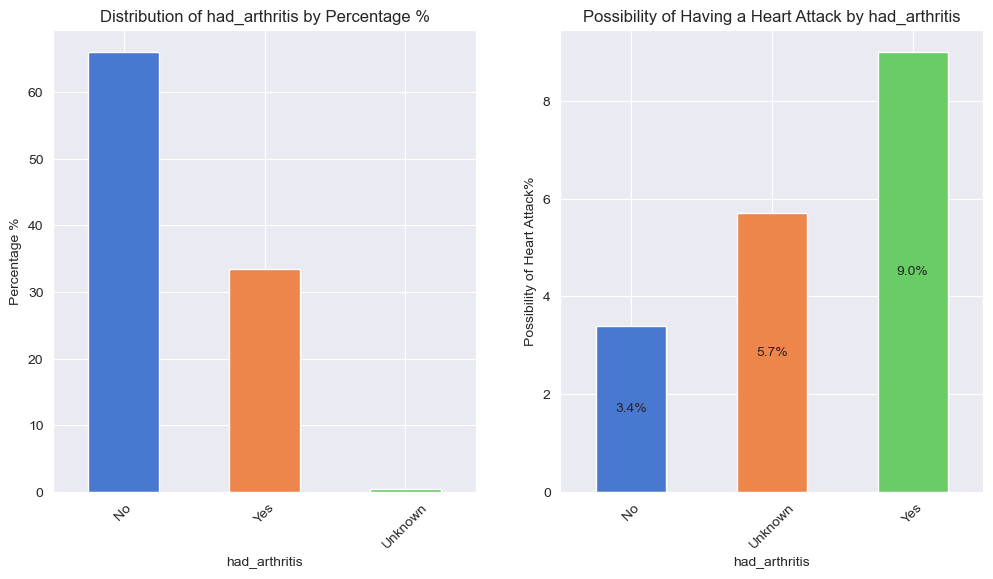

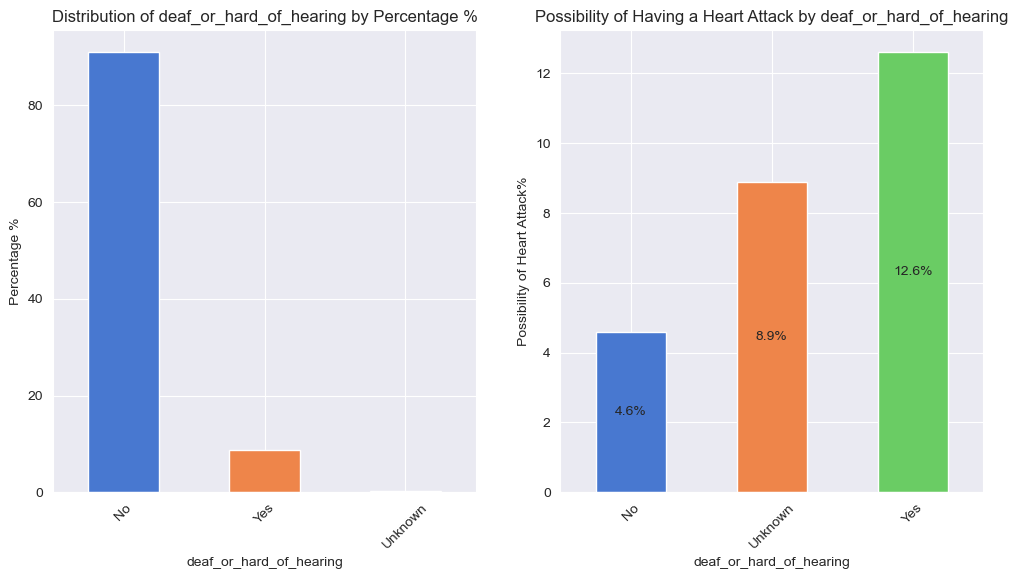

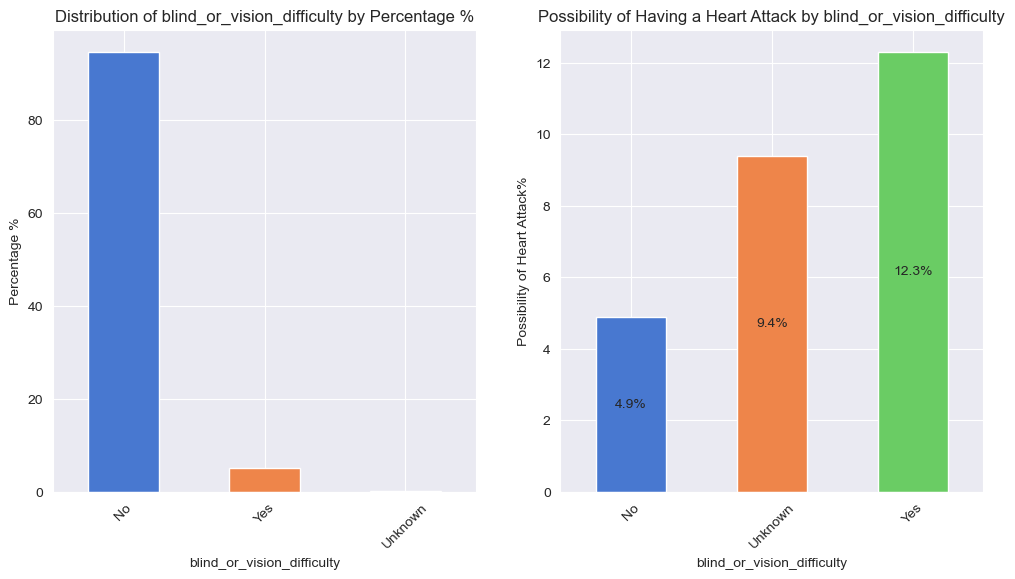

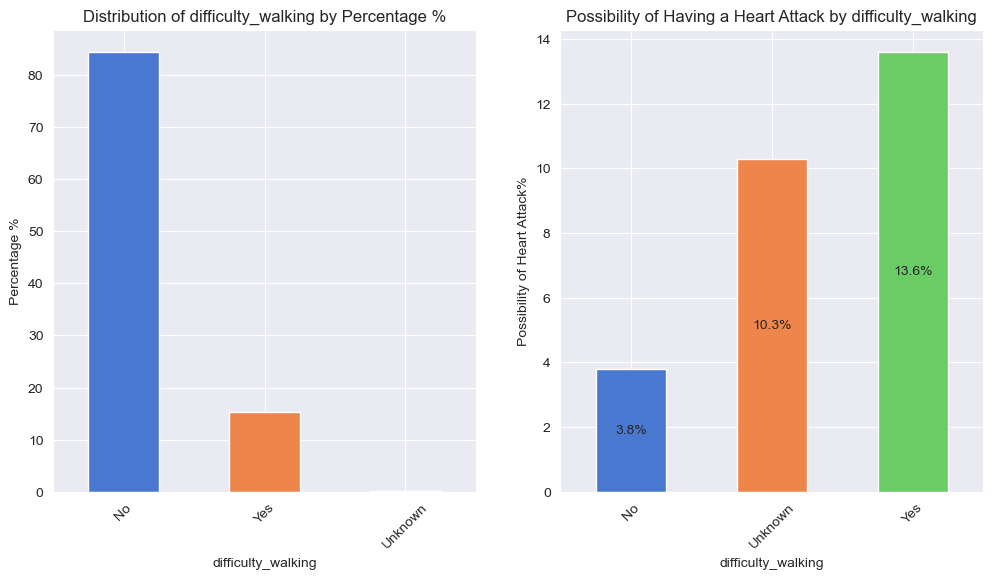

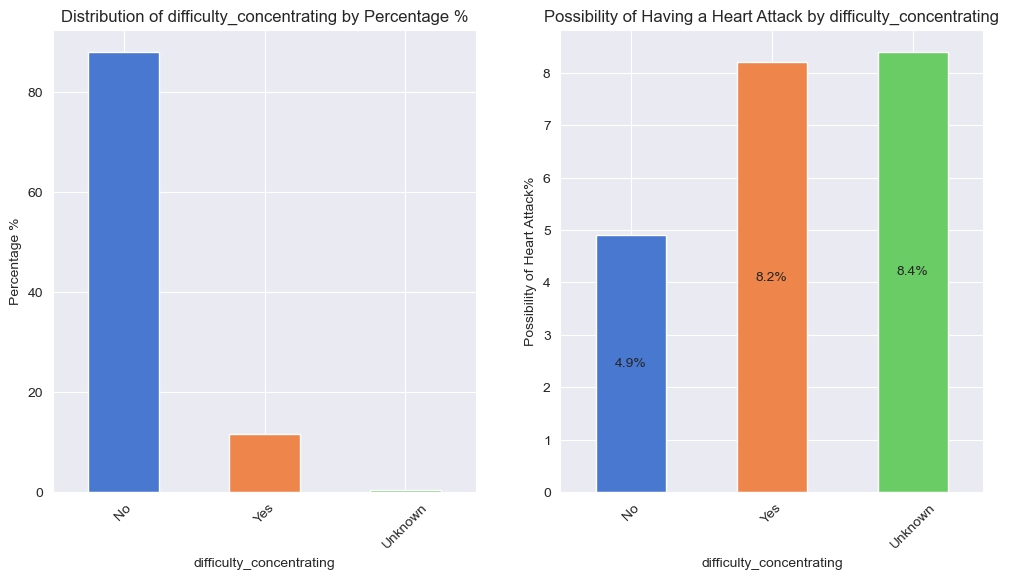

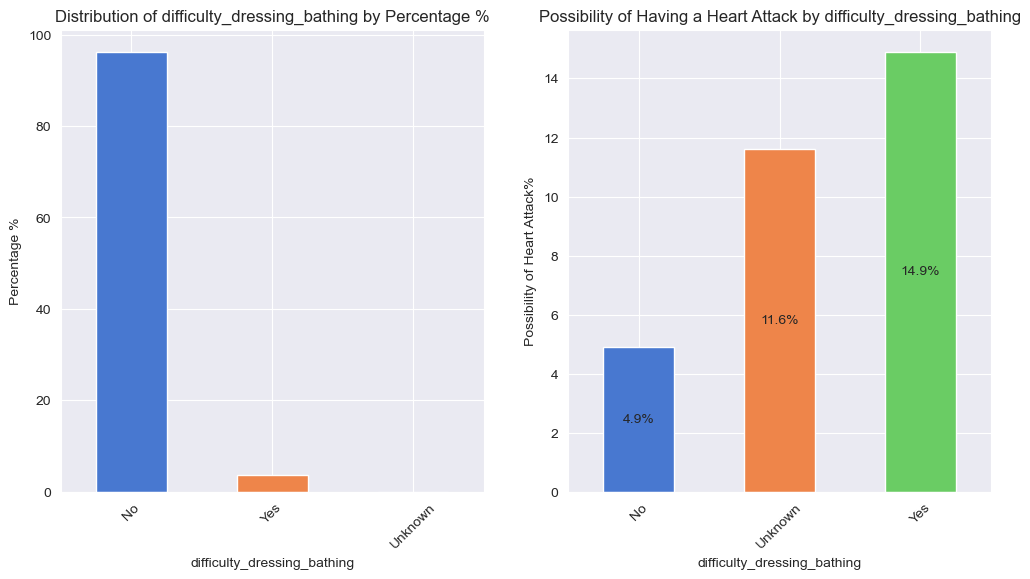

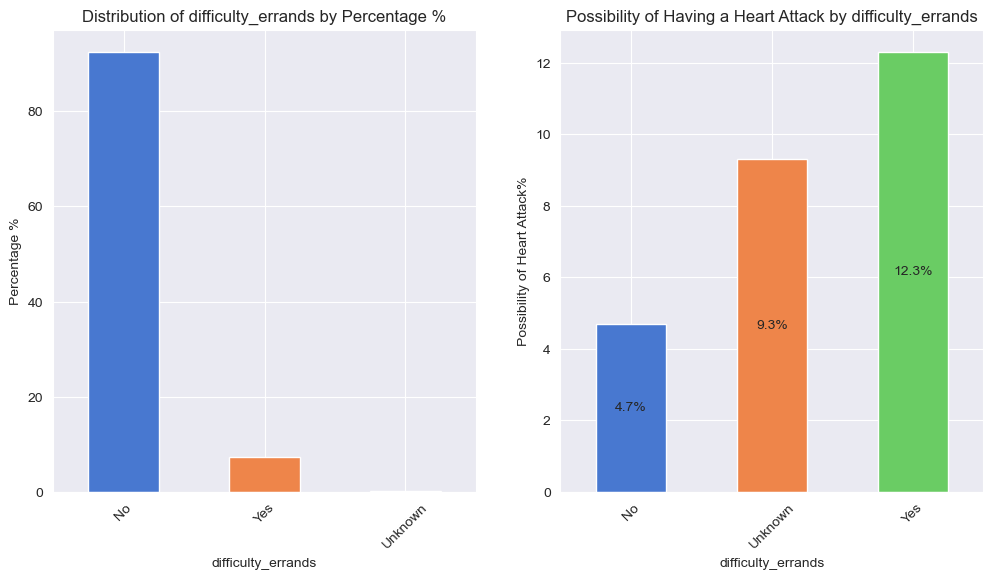

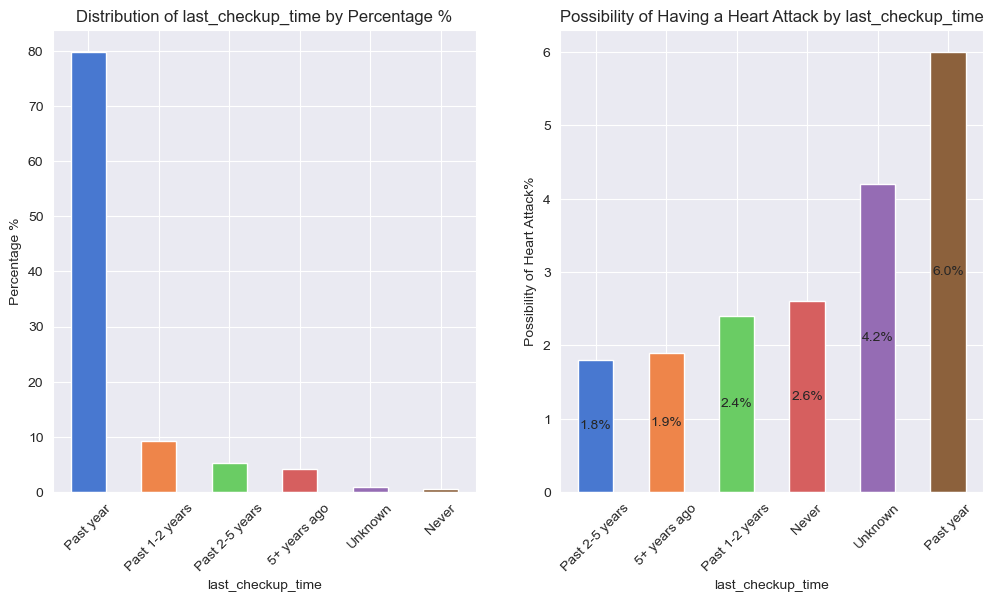

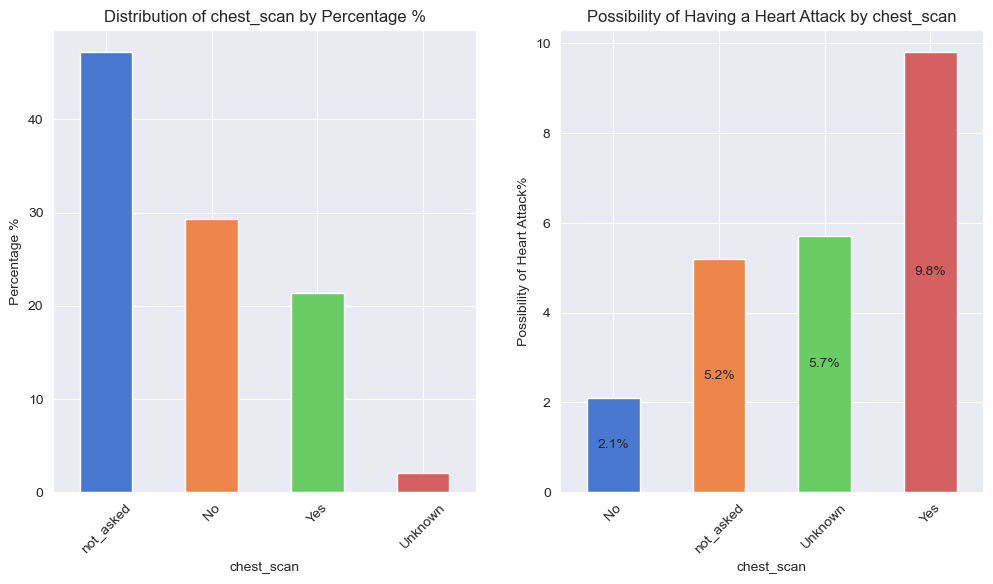

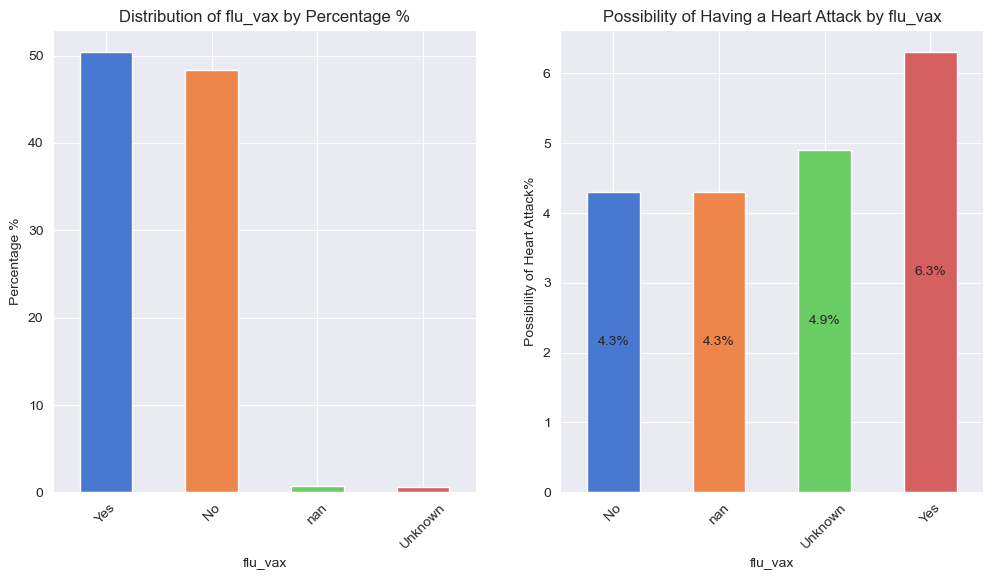

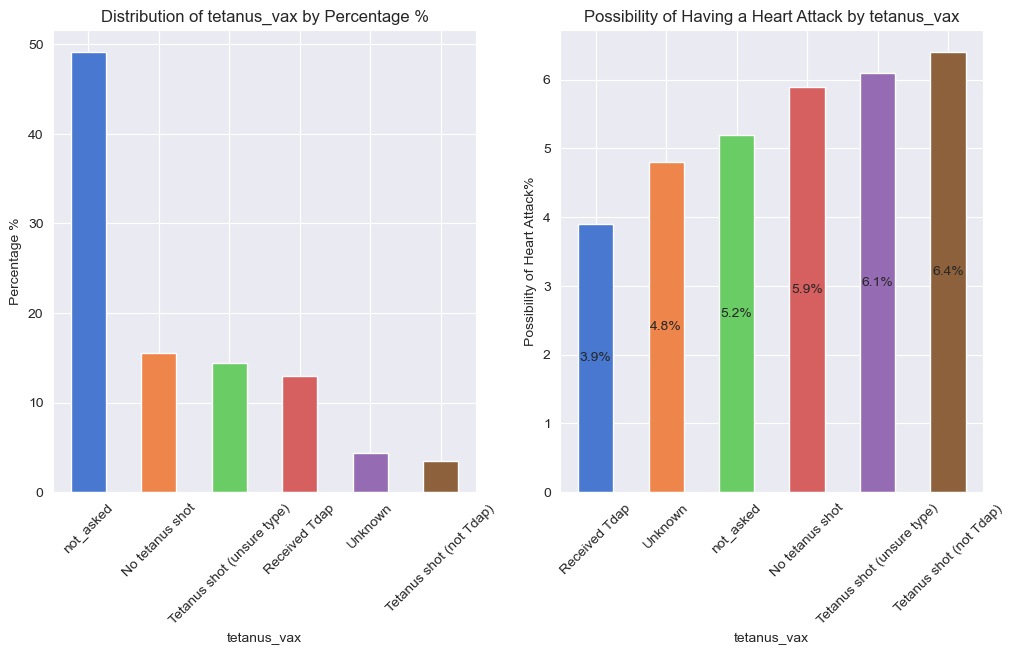

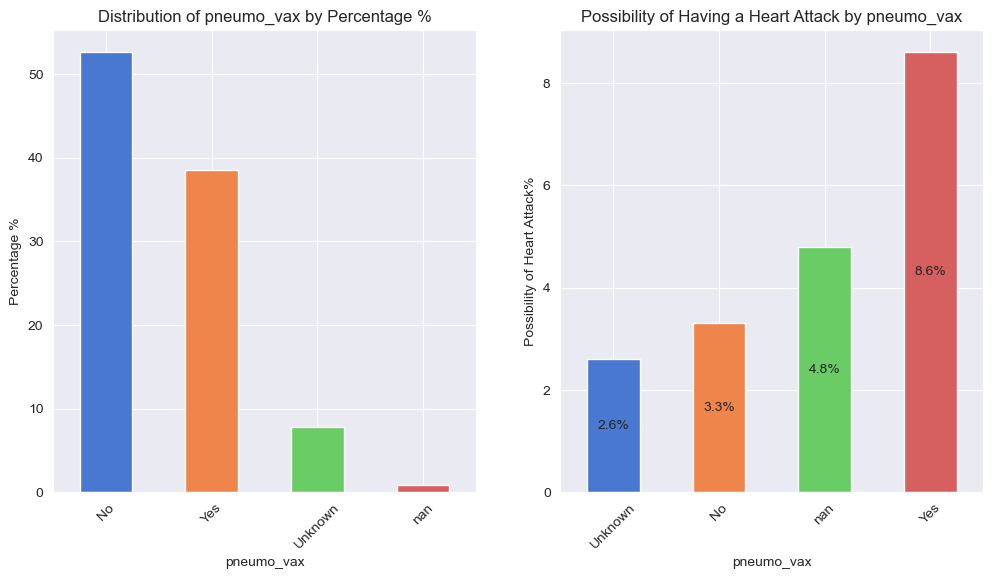

In [12]:
# Use for loops to iterate each catgorical columns 
for col in cat_cols:
    
    # Do not create plot if col equals state or had_heart_attack
    if (col == 'state') or (col == 'had_heart_attack'):
        continue
    
    # Create a cross_table with the count of each col regards to had_heart_attack
    cross_table = pd.crosstab(heart_attack_clean[col], heart_attack_clean['had_heart_attack'], dropna=False)
    
    # Use cross_table.sum(axis)=1 to find the sum of each category,
    # Use div, with axis=0 on the above results to find the percentage of each category had/not had a heart attack
    # Use round to 1 decimal point, and sort_values for aesthetic purpose
    percentage_table = (cross_table.div(cross_table.sum(axis=1), axis=0) * 100).round(1).sort_values(by='Yes')
    

    # Instantiate the subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Create first subplot, countplot of each category of col
    (heart_attack_clean[col].value_counts(normalize=True, dropna=False)*100)\
        .plot(kind='bar',ax=ax[0], color=palette)
    ax[0].set_title(f'Distribution of {col} by Percentage %')
    ax[0].set_ylabel('Percentage %')
    ax[0].tick_params(axis='x', rotation=45)

    # Create second subplot, stacked-barplot showing the percentage of each category had/not had a heart attack
    ax_1 = percentage_table['Yes'].plot(kind='bar', stacked=True, ax=ax[1], color=palette)
    ax[1].set_title(f'Possibility of Having a Heart Attack by {col}')
    ax[1].set_ylabel('Possibility of Heart Attack%')
    ax[1].tick_params(axis='x', rotation=45)


    # Show the percentages 
    for c in ax_1.containers:
        heights = c.datavalues # Get the heights of the bar
        labels = [f'{value:.1f}%' for value in heights] # create labels with % sign and round to 1 decimal place
        ax_1.bar_label(c, labels=labels, label_type='center') # add labels 
        
    plt.show()

**Important Findings:**
1. `age_category`: **age** appears to be **highly correlated** with the likelihood of having a heart attack, which increases **exponentially** after age 45. **Individuals aged 80 and older are often excluded from most existing models, leaving a critical gap in early detection for this vulnerable population.**
2. `had_angina`: Angina refers to chest pain caused by reduced blood flow to the heart. Respondents **with angina** have a **45.4%** likelihood of experiencing a heart attack.
3. `had_stroke`: Respondents who had a stroke has a significantly higher likelihood of having a heart attack.
3. `sex`: **Male** have a significantly higher possibility of having a heart attack.
4. `general_health`: Individuals rating their health as **poor** has a **significantly higher likelihood** of having a heart attack compared to those who rate it as **excellent**.
5. `smoker_status`: **smoking frequency** appears to be **positvely correlated** with likelihood of heart attack.
6. `physical_activities`: Individuals who reported **no physical activity** in the past month have a **significantly higher** likelihood of having a heart attack. 
 <br/><br/><br/>


**Other Findings:**
1. `race_ethnicity_category`: The distribution is highly imbalanced, with white respondents dominating. This may be due to differing levels of interest in healthcare survey participation, and access to healthcare services. Notably, 'Asian' individuals have a lower likelihood of experiencing a heart attack.
2. `alcohol_drinkers`: Interestingly, **alcohol drinkers** has a **lower likelihood** of heart attack.
3. `last_checkup_time`: Interestingly, individuals who had their **last checkup in the past year** show a **higher likelihood** of having a heart attack.
4. All medication history features exhibit a consistent pattern: respondents with certain disease histories, such as `had_copd`, `had arthritis`, show a higher likelihood of having a heart attack.
5. Same pattern was discovered in physical difficulty features such as `difficulty_dressing_bathing`, `difficulty_walking`.
6. The findings in points 4 nad 5 may be linked to the fact that older individuals (`age_category`) are more likely to exhibit these features. Given the positive correlation between age and the likelihood of having a heart attack, the features discussed in points 4 and 5 could act as confounding factors."
7.  Unlike`flu_vex` and `tetanus_vax`, `pneumo_vax` has uneven likelihood distribution where people who had such vaccination has a higher likelihood of having a heart attack. After some research online, I found that such vaccination are recommended for people over 65+ or people with chronic disease such as kidney disease. As a result, `pneumo_vax` could somehow be related to other features like `age_category` and `had_kidney_disease`.

---


#### `state`
1. Create a countplot of all states.
2. Create two stacked bar plots: one displaying the top 10 states with the highest likelihood of having a heart attack, and the other showing the bottom 10 states.


In [13]:
# Get the cross_table for state, same process as above
cross_tb = pd.crosstab(heart_attack_clean['state'], heart_attack_clean['had_heart_attack'], dropna=False).sort_values(by='No',ascending=False)

# Transform the cross_table into the percentage of each state having/not having a heart attack
pct_tb = ((cross_tb.div(cross_tb.sum(axis=1), axis=0) * 100)).round(1)

# Sort percent table by the percentage of having a heart attack, using descending order
pct_tb = pct_tb.sort_values(by='Yes', ascending=False)

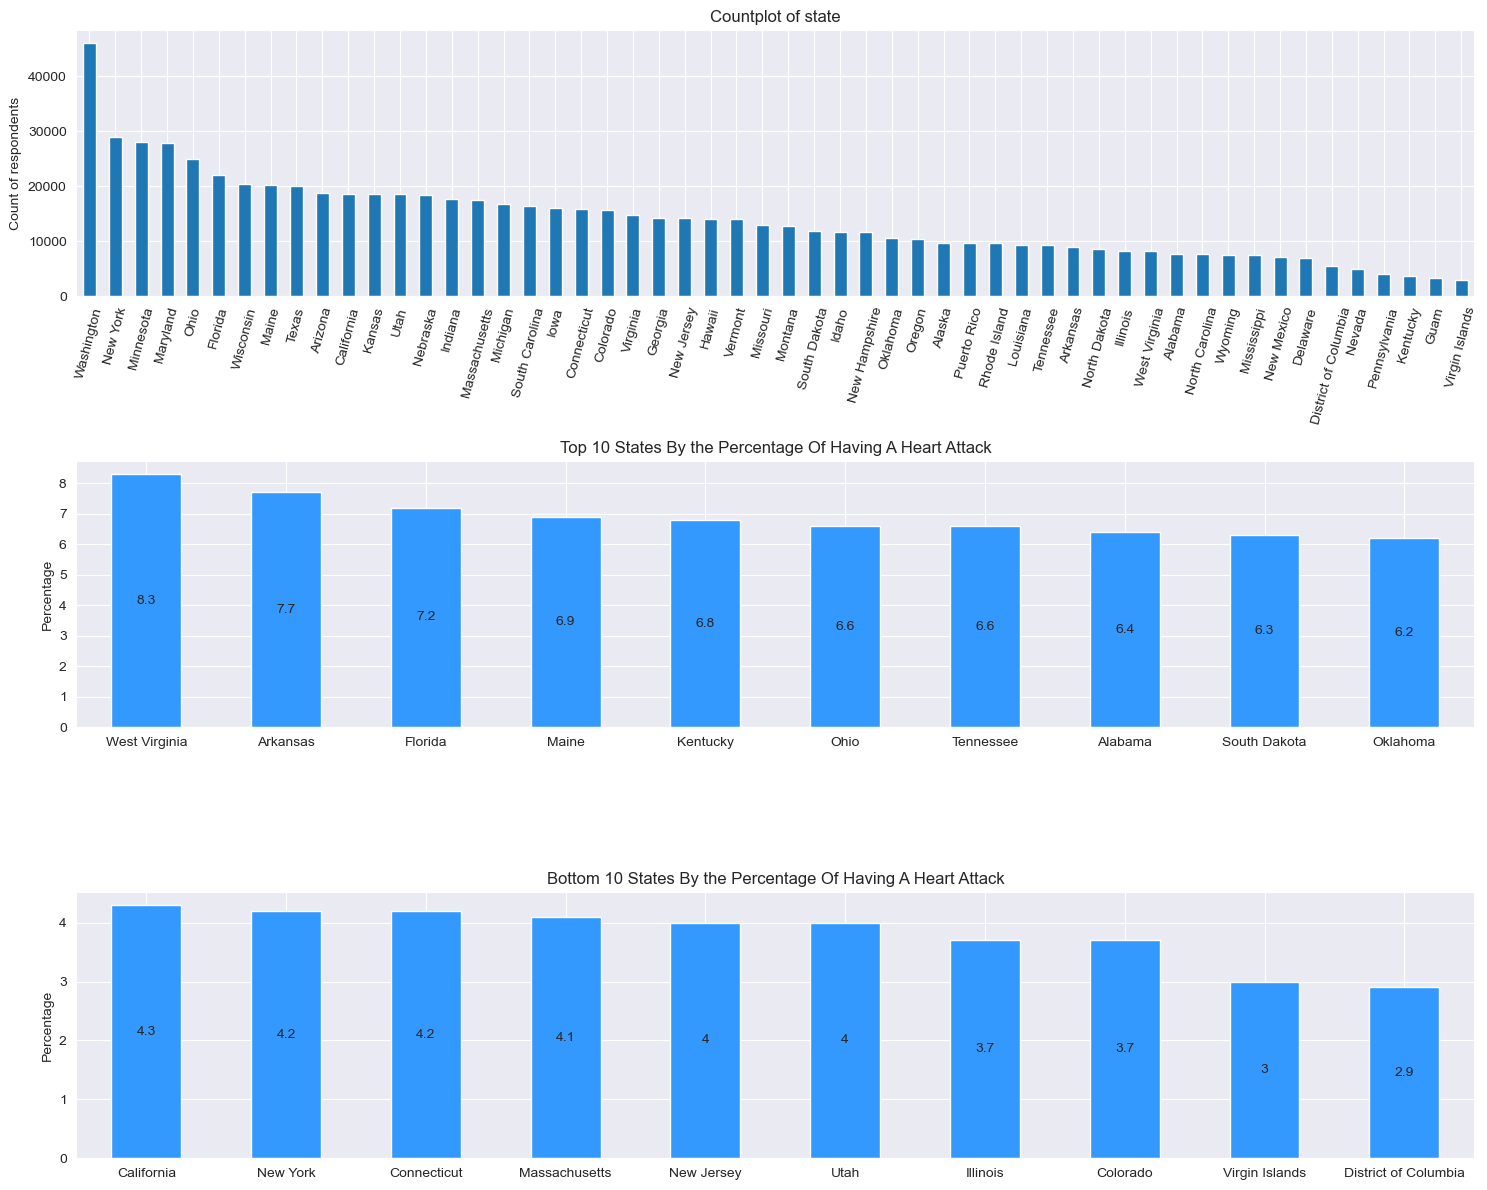

In [14]:
# Instantiate the subplot
fig, ax = plt.subplots(3, 1, figsize=(15,12))

# Plot the count of respondents for each state
cross_tb.sum(axis=1).sort_values(ascending=False).plot(kind='bar', ax=ax[0])
ax[0].set_title('Countplot of state')
ax[0].set_xlabel('')
ax[0].set_ylabel('Count of respondents')
ax[0].tick_params(axis='x', rotation=75)

# Plot the top 10 states in the percentage of respondents having a heart attack
ax_1 = pct_tb['Yes'][0:10].plot(kind='bar', stacked=True, ax=ax[1], color='#3399FF')
ax[1].set_title('Top 10 States By the Percentage Of Having A Heart Attack')
ax[1].set_xlabel('')
ax[1].set_ylabel('Percentage')
ax[1].tick_params(axis='x', rotation=0)
for c in ax_1.containers:
    ax_1.bar_label(c, label_type='center')

# Plot the bottom 10 states in the percentage of respondents having a heart attack
ax_2 = pct_tb['Yes'][-10:].plot(kind='bar', stacked=True, ax=ax[2], color='#3399FF')    
ax[2].set_title('Bottom 10 States By the Percentage Of Having A Heart Attack')
ax[2].set_xlabel('')
ax[2].set_ylabel('Percentage')
ax[2].tick_params(axis='x', rotation=0)
for c in ax_2.containers:
    ax_2.bar_label(c, label_type='center')

plt.tight_layout()
plt.show()

**Takeaways from `states`**:
- Washington and New York have the highest total number of respondents, while Guam and the Virgin Islands show the least number of observations. The original data source does not provide specific explanations for this phenomenon. However, upon cross-comparing the datasets from 2020 to 2023, I observed similar patterns in these years as well. Therefore, I believe this pattern may result from the way the survey is conducted across the U.S. and the populations of each state.
- Comparing the two bottom charts, the percentage of heart attack occurrences **differs significantly between states** like **West Virginia**  has higher percentages, and those with lower percentages, such as the **Virgin Islands**, and the **District of Columbia**.
- The [Geographical plot](https://public.tableau.com/app/profile/will.wu4586/viz/HeartAttackPrediction_17415842857530/Sheet1?publish=yes) reveals that **states located near the coast** tend to have a **lower likelihood** of heart attack.
---



### 2.4 Unique Advantages of This Project <a class="anchor" id="2d"></a>

- In my research of existing models at the proposal stage for this project, I found that most cardiovascular disease calculators impose age limits between 30 and 79. To illustrate the potential benefits of my model, I would like to present an additional visual in this section.
- The graph below clearly shows that respondents aged 80 and above have the highest likelihood of experiencing a heart attack. Unfortunately, they are excluded from current calculators, limiting their ability to accurately assess their risk. In contrast, my model does not have an age ceiling, allowing older adults to utilize it for early detection of heart attack risks and take proactive measures as needed.

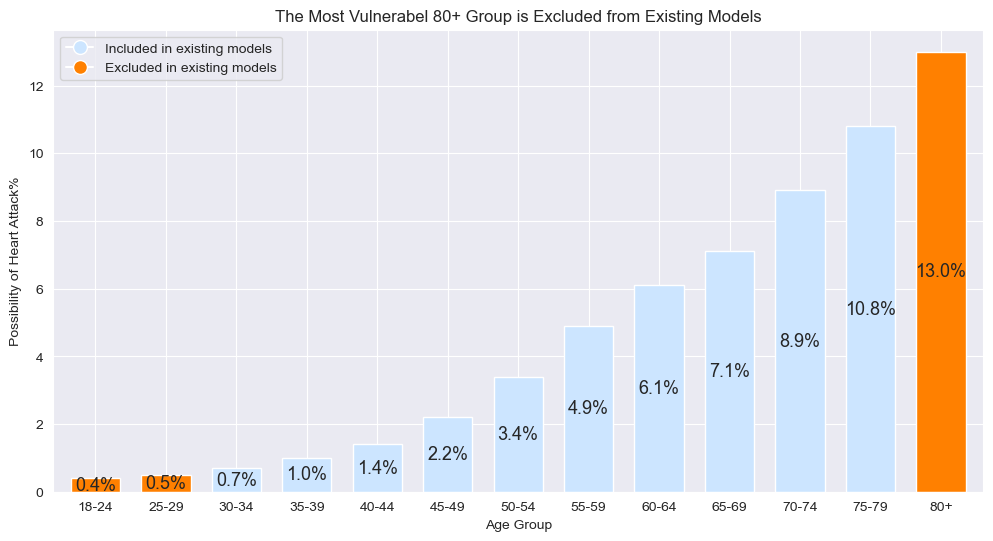

In [29]:
# Create a cross table and corresponding percentage table showing the possibility of having a heart attack by age category 
cross_table_age_ha =pd.crosstab(heart_attack_clean['age_category'], heart_attack_clean['had_heart_attack'])
pct_tb_age_ha = (cross_table_age_ha.div(cross_table_age_ha.sum(axis=1), axis=0) * 100).round(1)


# Instantiate the figure and set figsize
plt.figure(figsize=(12,6))

# Set up the colors for different age groups
age_colors = ['#FF8000', '#FF8000','#CCE5FF','#CCE5FF', '#CCE5FF', '#CCE5FF','#CCE5FF','#CCE5FF',
 '#CCE5FF','#CCE5FF','#CCE5FF','#CCE5FF','#FF8000']

# Create the plot showing the possibility of yes in had_heart_attack
fig = pct_tb_age_ha['Yes'].plot(kind='bar', stacked=True, width=0.7, color=age_colors)
plt.title(f'The Most Vulnerabel 80+ Group is Excluded from Existing Models')
plt.xlabel('Age Group')
plt.ylabel('Possibility of Heart Attack%')
plt.tick_params(axis='x', rotation=0)

# Display possibility on the bars
for c in fig.containers:
    heights = c.datavalues     # Get the heights of the bars
    labels = [f'{value:.1f}%' for value in heights] # Create labels formatted as percentages
    fig.bar_label(c, labels=labels, label_type='center', fontsize=13)   # Add labels to the bars

# Add legends  
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Included in existing models',
                markerfacecolor='#CCE5FF', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Excluded in existing models',
                markerfacecolor='#FF8000', markersize=10)
], loc='upper left')

plt.show()

---

### 2.5 Summary <a class="anchor" id="2e"></a>
Here are some main takeaways from the preliminary EDA process:
| Items | Takeaways      |
|-----------|------------------|
| Target variable | `had_heart_attack` shows a highly imbalanced distribution; accuracy alone is insufficient for evaluation|
|  `bmi` | Underweight and healthy BMI individuals are less likely to have a heart attack compared to overweight and obese individuals.  |
|`height` and  `weight`   |Different distributions are observed between those who had and did not have a heart attack.|
| `age_category`        | Strong exponential correlation with heart attack risk; likelihood increases significantly after age 45. |
| `had_angina`, `had_stroke`    | History of these conditions greatly increases heart attack likelihood.|
|`sex`        | Males are more likely to have a heart attack. |
|  `general_health`  | 	Individuals rating their health as poor are significantly more likely to experience a heart attack.    |
|  `smoker_status`  | 	Smoking frequency shows a positive correlation with heart attack likelihood. |
|  `physical_activities` | 	No physical activity in the past month significantly raises heart attack risk. |
|  `state` | 	The likelihood of experiencing a heart attack varies significantly among different states. |


<br>

---

## 3. Additional EDA: Addressing Missing Values <a class='anchor' id='3'></a>

This section of the EDA will build upon the insights gained from the Preliminary EDA. Its **purpose** is to explore **distribution of missing values**, **relationships among features**, with the goal of identifying values for imputing missing data.

---

In [20]:
# Recap of missing values
heart_attack_clean.isna().mean().sort_values(ascending=False).round(4) * 100

bmi                            5.20
weight                         4.44
height                         1.71
physical_health_days           1.68
pneumo_vax                     0.93
flu_vax                        0.69
year                           0.00
had_depressive_disorder        0.00
had_arthritis                  0.00
deaf_or_hard_of_hearing        0.00
blind_or_vision_difficulty     0.00
difficulty_walking             0.00
difficulty_errands             0.00
difficulty_concentrating       0.00
difficulty_dressing_bathing    0.00
had_diabetes                   0.00
last_checkup_time              0.00
chest_scan                     0.00
tetanus_vax                    0.00
had_kidney_disease             0.00
had_asthma                     0.00
had_copd                       0.00
had_skin_cancer                0.00
sex                            0.00
had_stroke                     0.00
had_angina                     0.00
stress_levels                  0.00
mental_health_days          

#### 3.1 `height`  <a class="anchor" id="3a"></a>

From the preliminary EDA of `height`, we know that height has two frequent ranges. Based on the intuition, I assume height is dependent of race, gender,ages, so I will create four plots to discover relevant information:
1. A boxplot of `height` vs `sex` 
2. Overlapping histograms of `height` for males and females represented in the `sex` column.
3. Bar charts showing the percentage difference in `height` compared to the mean across different groups in `race_ethnicity_category`.
4. Bar charts showing the percentage difference in `height` compared to the mean across different groups in `age_category`.

In [21]:
# Obtain a sorted list of age categories for enhanced visual presentation
age_categories = [age for age in heart_attack_clean['age_category'].unique() if pd.isna(age) == False]
age_categories = sorted(age_categories)

C:\Users\yehua\AppData\Local\Temp\ipykernel_27856\897219071.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


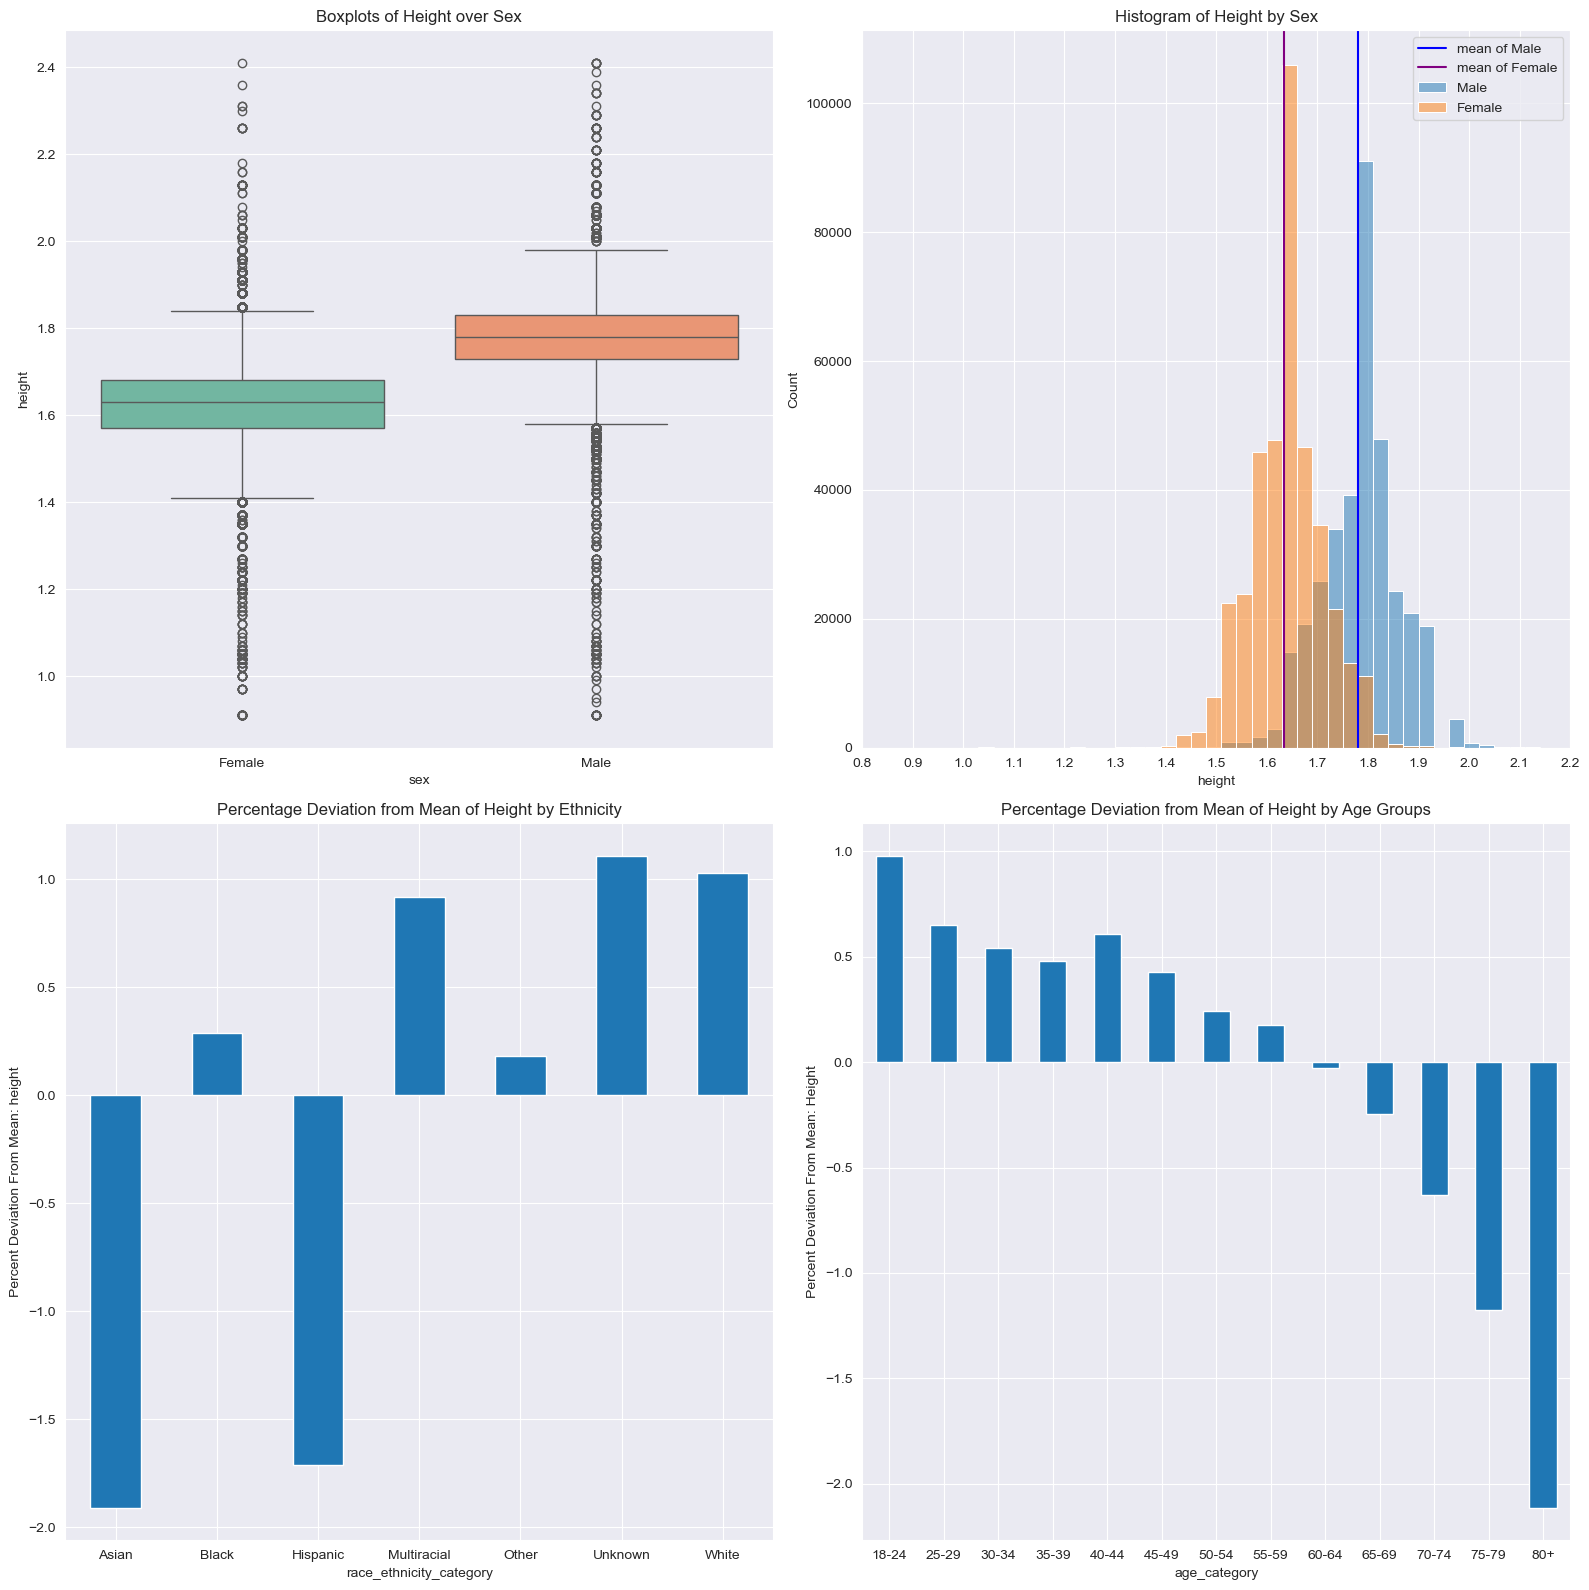

In [22]:
# draw a subplot with three subplots
fig, ax = plt.subplots(2, 2, figsize=(16,16))

# first plot: create the boxplot of Height over sex
sns.boxplot(
            x='sex',
            y='height',
            data=heart_attack_clean,
            palette='Set2',
            ax=ax[0, 0]
            )
ax[0, 0].set_title('Boxplots of Height over Sex')


                       
# second plot: create overlapped histograms of Height by Male and Female
# create the histogram of Male height, and create a line of Male height mean
sns.histplot(
             data=heart_attack_clean[heart_attack_clean['sex'] == 'Male'], 
             x='height', 
             bins=50,
             alpha=0.5, 
             label='Male',
             ax=ax[0, 1]
)
ax[0, 1].axvline(
            heart_attack_clean[heart_attack_clean['sex'] == 'Male']['height'].mean(), 
            label='mean of Male',
            color='blue',
)


# create the histogram of Female height, and create a line of Female height mean
sns.histplot(
            data=heart_attack_clean[heart_attack_clean['sex'] == 'Female'], 
            x='height', 
            bins=50,
            alpha=0.5,
            label='Female',
            ax=ax[0, 1]
)
ax[0, 1].axvline(
            heart_attack_clean[heart_attack_clean['sex'] == 'Female']['height'].mean(), 
            label='mean of Female',
            color='purple',
)

ax[0, 1].set_title('Histogram of Height by Sex')
ax[0, 1].set_xlim(0.8, 2.2)
ax[0, 1].set_xticks(np.arange(0.8, 2.3, 0.1))
ax[0, 1].legend()



# third plot, plot percent deviation from mean of Height for each Ethnicity
# create height_race_mean and height_race_mean_diff table.
height_race_mean = heart_attack_clean.groupby('race_ethnicity_category')['height'].mean()
height_race_mean_diff = (height_race_mean - height_race_mean.mean()) / height_race_mean * 100

height_race_mean_diff.plot(kind='bar', ax=ax[1, 0])
ax[1, 0].set_title('Percentage Deviation from Mean of Height by Ethnicity')
ax[1, 0].set_ylabel('Percent Deviation From Mean: height')
ax[1, 0].tick_params(axis='x', rotation=0)



# fourth plot, plot percent deviation from mean of Height for each Age category
# create height_age_mean and height__age_mean_diff table.
height_age_mean = heart_attack_clean.groupby('age_category')['height'].mean()
height_age_mean_diff = (height_age_mean - height_age_mean.mean()) / height_age_mean * 100
height_age_mean_diff = height_age_mean_diff.loc[age_categories, ]

height_age_mean_diff.plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title('Percentage Deviation from Mean of Height by Age Groups')
ax[1, 1].set_ylabel('Percent Deviation From Mean: Height')
ax[1, 1].tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()

**Takeaways:**
1. **Male and Female have very different distribution in `height`**:  The average height for 'Male' is close to 1.8 meters, while the average for 'Female' is slightly over 1.6 meters.
2. Height appears to have more subtle relationship with `race_ethnicity_group` and `age_group`. All the percent deviations from the mean fall between -1.5%-1.5% except the group of age 80+. Considering that the average height is around 1.7 meters, the absolute deviation is approximately 0.025 meters, which is relatively insignificant.
3. Thus, **`sex` will be utilized to impute missing values in `height`**. As both males and females show a normal distribution in height, I will **assign the mean height values based on gender to the missing entries**.
___

#### 3.2 `weight`  <a class="anchor" id="3b"></a>

 - From the previous EDA observations, `weight` appears to have a normal distribution with slightly right skewed. 
 - Similarly, I assume weight is dependent of race, gender, and ages, so I will create four plots to discover relevant information:
    1. A boxplot of `weight` vs `sex` 
    2. Overlapping histograms of `weight` for males and females represented in the `sex` column.
    3. Bar charts showing the percentage difference in `weight` compared to the mean across different groups in `race_ethnicity_category`.
    4. Bar charts showing the percentage difference in `weight` compared to the mean across different groups in `age_category`.

C:\Users\yehua\AppData\Local\Temp\ipykernel_27856\3247848420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


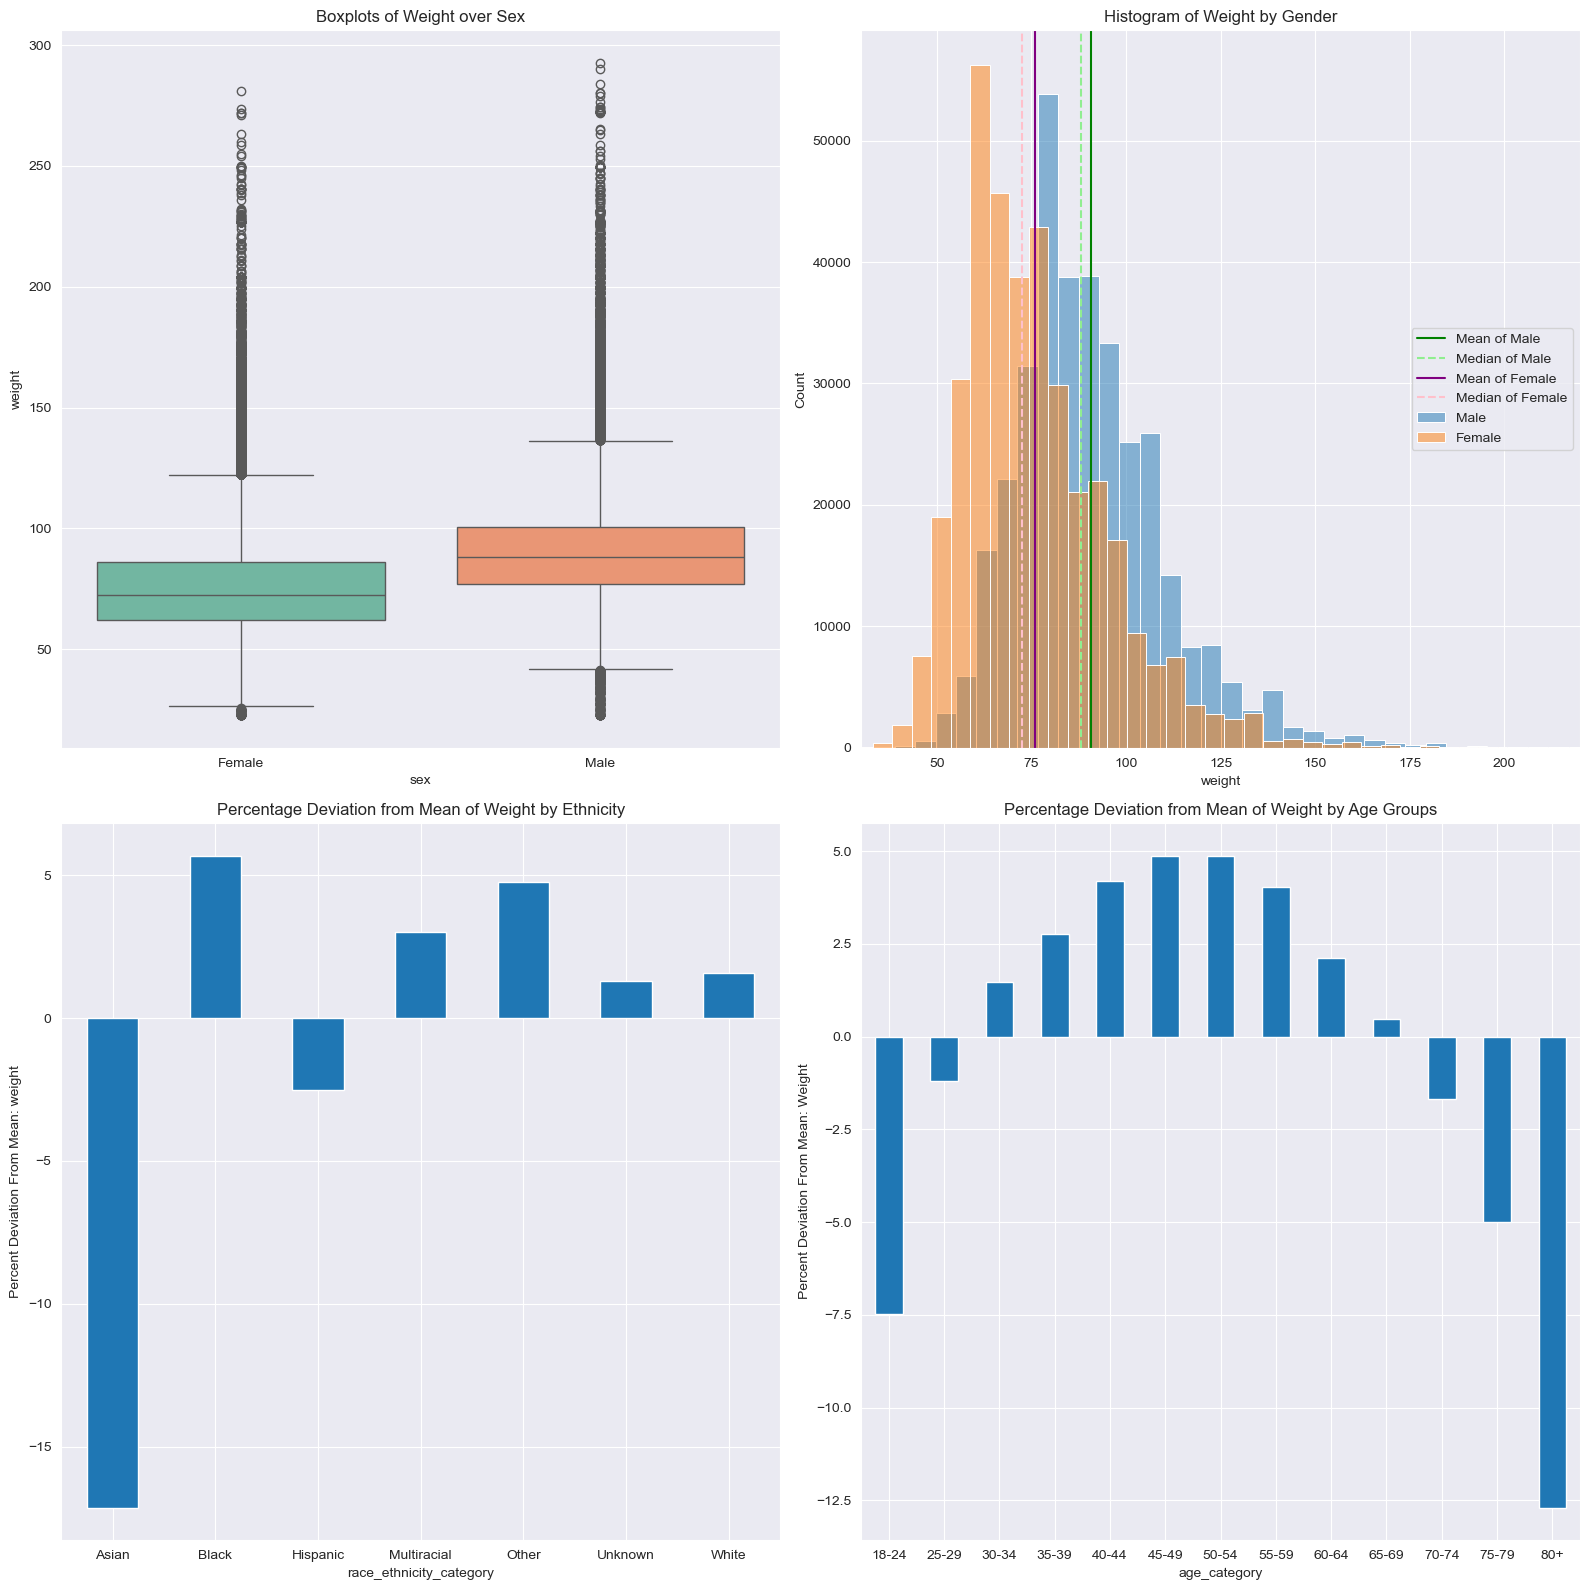

In [23]:
# draw a subplot with three subplots
fig, ax = plt.subplots(2, 2, figsize=(16,16))

# # first plot: create the boxplot of weight over sex
sns.boxplot(
            x='sex',
            y='weight',
            data=heart_attack_clean,
            palette='Set2',
            ax=ax[0, 0]
            )
ax[0, 0].set_title('Boxplots of Weight over Sex')

                       
# second plot: create overlapped histograms of weight by Male and Female
# create the histogram of Male weight, and create a line of Male weight mean
sns.histplot(
             data=heart_attack_clean[heart_attack_clean['sex'] == 'Male'], 
             x='weight', 
             bins=50,
             alpha=0.5, 
             label='Male',
             ax=ax[0, 1]
)
ax[0, 1].axvline(
            heart_attack_clean[heart_attack_clean['sex'] == 'Male']['weight'].mean(), 
            label='Mean of Male',
            color='#008000',
)
ax[0, 1].axvline(
            heart_attack_clean[heart_attack_clean['sex'] == 'Male']['weight'].median(), 
            ls='--',
            lw='1.5',
            label='Median of Male',
            color='#90EE90',
)


# create the histogram of Female weight, and create a line of Female weight mean
sns.histplot(
            data=heart_attack_clean[heart_attack_clean['sex'] == 'Female'], 
            x='weight', 
            bins=50,
            alpha=0.5,
            label='Female',
            ax=ax[0, 1]
)
ax[0, 1].axvline(
            heart_attack_clean[heart_attack_clean['sex'] == 'Female']['weight'].mean(), 
            label='Mean of Female',
            color='purple',
)
ax[0, 1].axvline(
            heart_attack_clean[heart_attack_clean['sex'] == 'Female']['weight'].median(), 
            ls='--',
            lw='1.5',
            label='Median of Female',
            color='pink',
)

ax[0, 1].set_title('Histogram of Weight by Gender')
ax[0, 1].set_xlim(30, 220)
ax[0, 1].legend(loc='center right')



# third plot, plot percent deviation from mean of weight for each Ethnicity
# create weight_race_mean and weight_race_mean_diff table.
weight_race_mean = heart_attack_clean.groupby('race_ethnicity_category')['weight'].mean()
weight_race_mean_diff = (weight_race_mean - weight_race_mean.mean()) / weight_race_mean * 100

weight_race_mean_diff.plot(kind='bar', ax=ax[1, 0])
ax[1, 0].set_title('Percentage Deviation from Mean of Weight by Ethnicity')
ax[1, 0].set_ylabel('Percent Deviation From Mean: weight')
ax[1, 0].tick_params(axis='x', rotation=0)



# fourth plot, plot percent deviation from mean of weight for each Age category
# create weight_age_mean and weight__age_mean_diff table.
weight_age_mean = heart_attack_clean.groupby('age_category')['weight'].mean()
weight_age_mean_diff = (weight_age_mean - weight_age_mean.mean()) / weight_age_mean * 100

weight_age_mean_diff.plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title('Percentage Deviation from Mean of Weight by Age Groups')
ax[1, 1].set_ylabel('Percent Deviation From Mean: Weight')
ax[1, 1].tick_params(axis='x', rotation=0)


plt.tight_layout()
plt.show()

**Takeaways:**
1. Gender Differences: Males and females exhibit notable differences in average weight values.
2. Weight Distribution: The `weight` distribution for both males and females is slightly right-skewed, so median is a better representation of weight comparing to mean.
3. Racial Variability: 'Asian' has significantly lower mean of weight.
4. Age Impact: Respondents in the age ranges of 18-24 and 80+ have weight values that notably deviate from the overall mean.
5. Based on above analysis,  I will impute the missing values in the `weight` column using the **median weight** for **each combination of `sex` and `age_category`.** I will first visulize the median weight for each combination to check if such solution appears valid.


In [24]:
# Calculate the average weight by sex and age_category
weight_agesex_median = heart_attack_clean.groupby(['sex', 'age_category'])['weight'].median()

# reset index to turn into a DataFrame for visualization
weight_agesex_median = weight_agesex_median.reset_index()

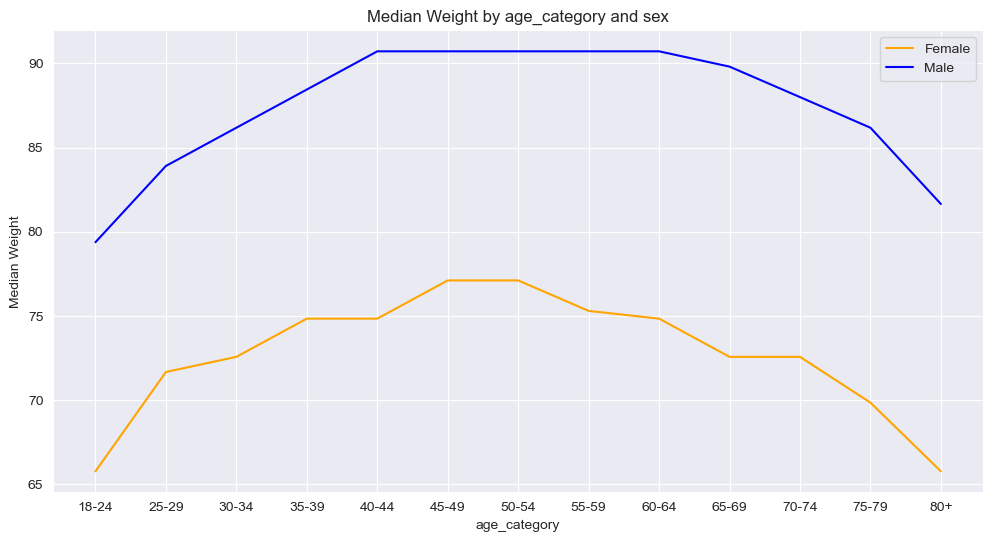

In [25]:
# Instantiate the graph
plt.figure(figsize=(12, 6))

# Plot the Female Average Weight by age_category
plt.plot(
         weight_agesex_median.loc[weight_agesex_median['sex'] == 'Female', 'age_category'],
         weight_agesex_median.loc[weight_agesex_median['sex'] == 'Female', 'weight'],
         label = 'Female',
         color='#FFA500'
         )

# Plot the Male Average Weight by age_category
plt.plot(
         weight_agesex_median.loc[weight_agesex_median['sex'] == 'Male', 'age_category'],
         weight_agesex_median.loc[weight_agesex_median['sex'] == 'Male', 'weight'],
         label = 'Male',
         color= '#0000FF'
         )
plt.title('Median Weight by age_category and sex')
plt.xlabel('age_category')
plt.ylabel('Median Weight')
plt.legend()

- The median weight for each combination of `age_category` and `sex` aligns with my findings: males have a generally higher weight compared to females. Additionally, the weight peaks around the age of 45 and gradually decreases thereafter.
- Therefore，I will impute the missing values in the `weight` column using the **median weight** for **each combination of `sex` and `age_category`.**

---

#### 3.3  `physical_health_days`  <a class="anchor" id="3c"></a>

- `physical_health_days` is defined as the number of days with poor physical health in the past 30 days.
- Based on the findings from the Preliminary EDA, the distribution of `physical_health_days` is extremely skewed, with the majority of individuals reporting a value of 0 and an observable number reporting the maximum value of 30. I assume that older age groups may have a higher percentage of missing values in `physical_health_days` due to uncertainty in recalling the exact number of days in poor physical condition, potentially leading them to skip the question.

- To investigate this hypothesis, I will assess whether there is a correlation between age_category and the missing values in physical_health_days. My approach will include the following steps:
    1. Create plots to visualize the distribution of missing values across all age groups 
    2. Examine any correlations between `age_category` and `physical_health_days`.

In [26]:
# Create a table to of how missing values in physical_health_days distributed across ages
nan_phd_age = heart_attack_clean\
    .loc[heart_attack_clean['physical_health_days'].isna(), 'age_category']\
    .value_counts().sort_values(ascending=False)
nan_phd_age

age_category
80+      2370
70-74    1516
75-79    1428
65-69    1354
60-64    1141
55-59     809
50-54     733
18-24     627
40-44     553
45-49     552
35-39     547
30-34     518
25-29     466
Name: count, dtype: int64

In [27]:
# Turn count of missing values into percentages
nan_phd_age = round(nan_phd_age.div(nan_phd_age.sum()) * 100, 1)
nan_phd_age

age_category
80+      18.8
70-74    12.0
75-79    11.3
65-69    10.7
60-64     9.0
55-59     6.4
50-54     5.8
18-24     5.0
40-44     4.4
45-49     4.4
35-39     4.3
30-34     4.1
25-29     3.7
Name: count, dtype: float64

C:\Users\yehua\AppData\Local\Temp\ipykernel_27856\1961883861.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


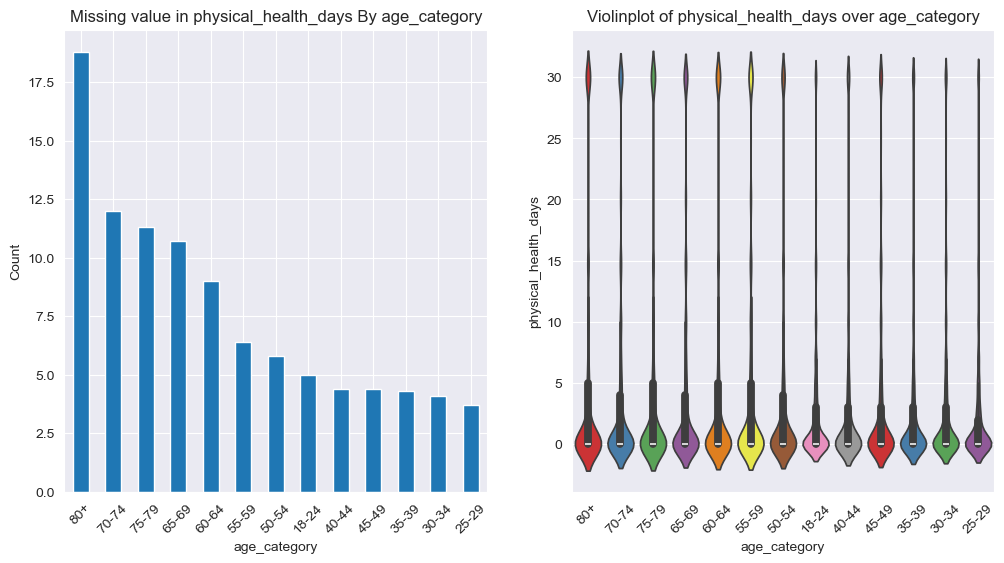

In [28]:
# Instantiate a subplot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# In the first subplot, show how missing values change across age categories
nan_phd_age.plot(kind='bar', ax=ax[0])
ax[0].set_title('Missing value in physical_health_days By age_category')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

# In the second subplot, show how physical health days vary across all age categories
sns.violinplot(
            x='age_category',
            y='physical_health_days',
            data=heart_attack_clean,
            palette='Set1',
            order=nan_phd_age.index,
            ax=ax[1]
)
ax[1].set_title('Violinplot of physical_health_days over age_category')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

**Takeaways**
- Individuals over 80 show a higher likelihood of missing values in physical_health_days, but no single age group clearly dominates this issue. The violin plot indicates similar distributions across age groups, suggesting that median imputation would merely replace missing values with median which equals zero, and this is not ideal. Therefore, I will explore additional variables to identify a more effective method for addressing missing values.
- Based on the definition of `physical activities` and `general_health`, there appears to be a correlation with `physical_health_days`. Currently, my assumptions are: Individuals who participated in physical activities in the past month and those who rated their health as 'very good' or 'excellent' tend to have lower values in `physical_health_days`.

C:\Users\yehua\AppData\Local\Temp\ipykernel_27856\1263794092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\yehua\AppData\Local\Temp\ipykernel_27856\1263794092.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


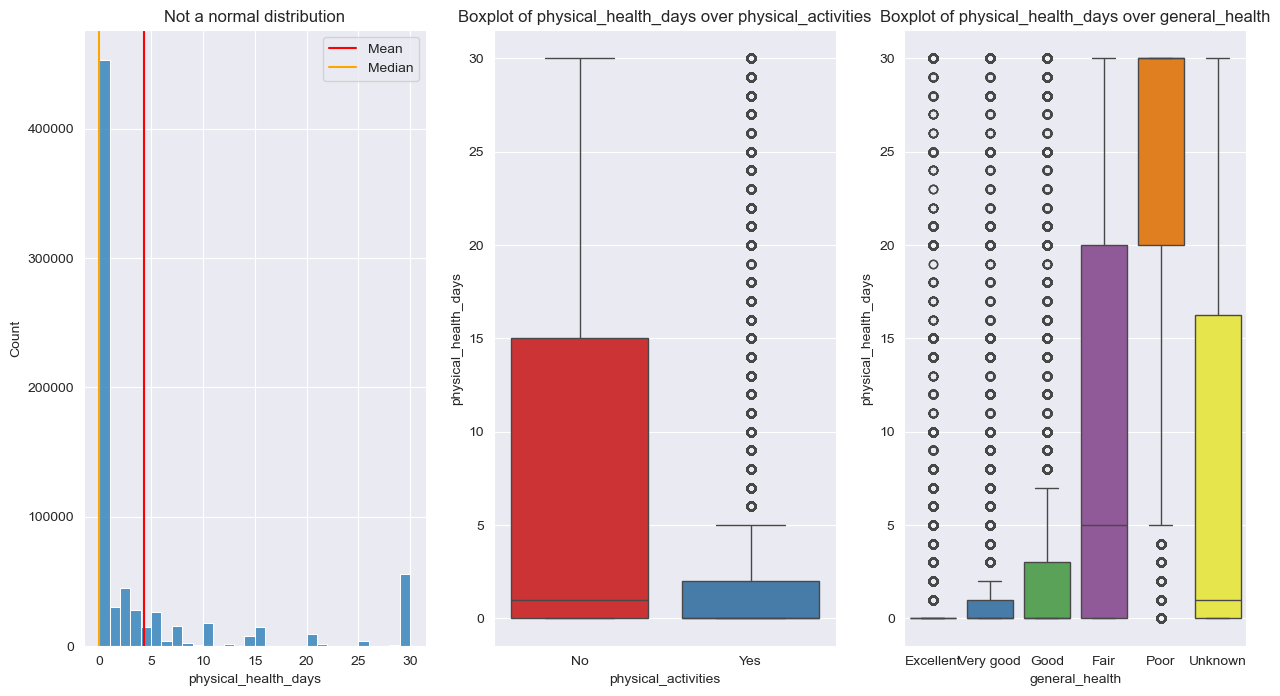

In [29]:
# Create a subplot with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

# Recap on the distribution of physical_health_days
sns.histplot(heart_attack_clean['physical_health_days'], bins=30, ax=ax[0])
ax[0].axvline(x=heart_attack_clean['physical_health_days'].mean(), color='red', label='Mean')
ax[0].axvline(x=heart_attack_clean['physical_health_days'].median(), color='orange', label='Median')   
ax[0].set_title('Not a normal distribution')
ax[0].legend()

# Boxplot of physical_health_days over physical activities
sns.boxplot(
            x='physical_activities',
            y='physical_health_days',
            data=heart_attack_clean,
            palette='Set1',
            ax=ax[1]
)
ax[1].set_title('Boxplot of physical_health_days over physical_activities')
                       

# Boxplot of physical_health_days over general health                       
sns.boxplot(
            x='general_health',
            y='physical_health_days',
            data=heart_attack_clean,
            palette='Set1',
            ax=ax[2],
            order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor', 'Unknown']
)
ax[2].set_title('Boxplot of physical_health_days over general_health')
           
plt.show()

**Takeaways:**
1. `physical_health_days`  appears to correlate with `physical_activities`: Individuals who did not engage in exercise over the past month tend to report a higher number of poor physical health days.
2. A clear correlation exists between `physical_health_days` and `general_health`: Respondents who consider themselves healthier report fewer poor physical health days.
3. `general_health` seems to be a better fit for imputing missing values in `physical_health_days`: The distinction among groups in general_health is quite pronounced. Given that `physical_health_days` is extremely right-skewed and is a discrete variable, I will use the median to impute missing values based on the corresponding categories in general_health.

In [30]:
# Check the median of physical_health_days for each category in general_health
heart_attack_clean.groupby('general_health')['physical_health_days'].agg('median').sort_values()

general_health
Excellent     0.0
Good          0.0
Very good     0.0
Unknown       1.0
Fair          5.0
Poor         30.0
Name: physical_health_days, dtype: float64

In [31]:
# Check the median of physical_health_days for each category in physical_activities
heart_attack_clean.groupby('physical_activities')['physical_health_days'].agg('median')

physical_activities
No     1.0
Yes    0.0
Name: physical_health_days, dtype: float64

- By comparing the median of each category within `general_health` and `physical_activities`,  `general_health` appears to be a option for imputing missing values in `physical_health_days`.
---

#### 3.4 `pneumo_vax` and `flu_vax` <a class="anchor" id="3d"></a>

Since both `pneumo_vax` and `flu_vax` capture similar information, it is reasonable to assume that respondents may have either not been asked these questions or skipped them simultaneously. To investigate this hypothesis, I will create a stacked bar plot to compare the counts of missing values for both variables and missing values only in one of the vaccinations.

In [32]:
# Count the number of missing values
pneumo_missing = heart_attack_clean['pneumo_vax'].isna().sum()
flu_missing = heart_attack_clean['flu_vax'].isna().sum()
both_missing = ((heart_attack_clean['pneumo_vax'].isna()) & (heart_attack_clean['flu_vax'].isna())).sum()

# Create the dataframe for plotting
missing_counts_df = pd.DataFrame({
    'NaN in pneumo_vax': [both_missing, pneumo_missing - both_missing],
    'NaN in flu_vax': [both_missing, flu_missing - both_missing]
},
    index=['Both missing', 'Only missing single value']
)

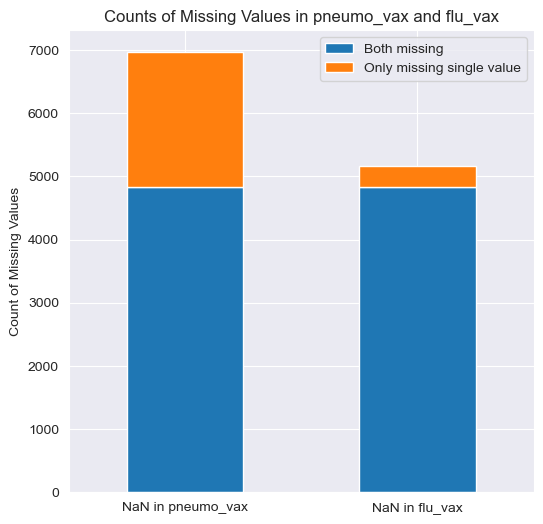

In [33]:
# Crate the stacked barplot
missing_counts_df.T.plot(kind='bar', stacked=True)
plt.title('Counts of Missing Values in pneumo_vax and flu_vax')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=0)
plt.legend()

plt.show()

- It is clear that missing values occur simultaneously in both `pneumo_vax` and `flu_vax`. 
- Given that a significant proportion of respondents had missing values for `tetanus_vax` due to the question not being asked, I will also assume that the missing values in `pneumo_vax` and `flu_vax` arise from the same reason and replace them with the category 'not_asked'. Before proceeding, I will verify this assumption by creating a plot to visualize the distribution of missing values in `pneumo_vax` and `flu_vax` across the categories in `tetanus_vax`, which will help identify any trends.



In [34]:
# Create a table showing the count of missing values in pneumo_vax across tetanus_vax
nan_pvax_stress = heart_attack_clean\
    .loc[heart_attack_clean['pneumo_vax'].isna(), 'tetanus_vax']\
    .value_counts().sort_values()
nan_pvax_stress

tetanus_vax
Tetanus shot (not Tdap)          8
Unknown                         20
Received Tdap                   39
Tetanus shot (unsure type)      49
No tetanus shot                 50
not_asked                     6799
Name: count, dtype: int64

In [35]:
# Create a table showing the count of missing values in flu_vax across tetanus_vax
nan_flu_stress = heart_attack_clean\
    .loc[heart_attack_clean['flu_vax'].isna(), 'tetanus_vax']\
    .value_counts().sort_values()
nan_flu_stress

tetanus_vax
Tetanus shot (not Tdap)         20
Unknown                         46
Received Tdap                   48
Tetanus shot (unsure type)      74
No tetanus shot                 79
not_asked                     4890
Name: count, dtype: int64

Text(0.5, 0.02, 'tetanus_vax')

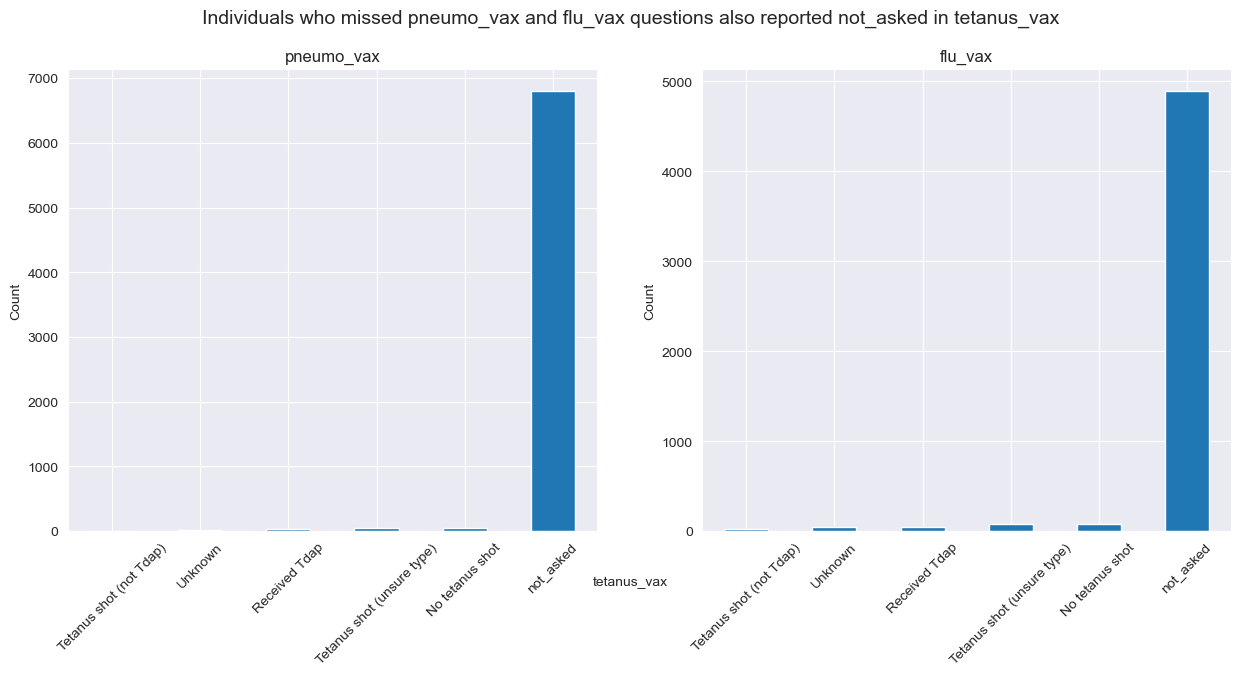

In [36]:
# Instantiate the subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Create the count plot of missing values in pneumo_vax across categories in tetanus_vax
nan_pvax_stress.plot(kind='bar', ax=ax[0])
ax[0].set_title("pneumo_vax")
ax[0].set_xlabel('')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

# Create the count plot of missing values in flu_vax across categories in tetanus_vax
nan_flu_stress .plot(kind='bar', ax=ax[1])
ax[1].set_title("flu_vax")
ax[1].set_xlabel('')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)

# Set properties that share titles and xlabes
fig.suptitle('Individuals who missed pneumo_vax and flu_vax questions also reported not_asked in tetanus_vax', fontsize=14)
fig.text(0.5, 0.02, 'tetanus_vax', ha='center')


**Takeaways**
- Respondents who were labeled 'not_asked' for the `tetanus_vax` question are likely to also have missing values for `pneumo_vax` and `flu_vax`, possibly because certain surveys omit questions on vaccination records.
- As a result, I will replace the missing values in `pneumo_vax` and `flu_vax` with 'not_asked'.
- Please note that 'not_asked' is the imputed value for missing entries in `tetanus_vax`. Consequently, all missing values in the vaccination variables will be replaced with the same category, 'not_asked'.
---

#### 3.5 Summary of Missing Values Solutions<a class="anchor" id="3e"></a>

By far, the following methods will be implemented for addressing missing values in:

| Variables | Description      |
|-----------|------------------|
|    `height`     | Impute missing values in `height` based on mean height values of each gender in `sex` column. |
| `weight` | Impute missing values in `weight` with the median weight for each combination of `sex` and `age_category`.   |
| `bmi` | Missing values in `bmi` can calculated with imputed `height` and `weight`. |
| `physical_health_days` |  Impute missing values in `physical_health_days` with the median of each category in `general_health` |
| `pneumo_vax` and `flu_vax` |  Replace missing values in both varaibales with 'not_asked'. |

<br>

---

According to the defition of BMI, it has categorized people into four groups of 'underweight', 'healthy', 'overweight' and 'obese'. From the findings in preliminary EDA, the boundary line between 'healthy' and 'obese' line appears to be a cutting point where people under bmi of 25 are less likely to have a heart attack, vice versa. Therefore, I am interested in binning the 

In [37]:
# 
overweight_group = heart_attack_clean[heart_attack_clean['bmi'] >= 25]
not_overweight_group = heart_attack_clean[heart_attack_clean['bmi'] < 25]

overweight_group['had_heart_attack'].value_counts(normalize=True)


had_heart_attack
No     0.941578
Yes    0.058422
Name: proportion, dtype: float64

In [38]:
not_overweight_group['had_heart_attack'].value_counts(normalize=True)

had_heart_attack
No     0.957064
Yes    0.042936
Name: proportion, dtype: float64

In [39]:
heart_attack_clean['had_heart_attack'].value_counts(normalize=True)

had_heart_attack
No     0.94723
Yes    0.05277
Name: proportion, dtype: float64

## 4. Data Cleaning and Export - Stage 2 <a class='anchor' id='4'></a>

In this section, I will implement the methods discussed above to address the remaining missing values, and after that I will export a finalized and clean dataset that ready to be feature engineering and baseline modeling.

#### 4.1 `height` <a class="anchor" id="4a"></a>

Impute missing values in `height` based on mean height values of each gender in `sex` column.

In [40]:
# Get the mean of height for Female and Male
f_height_avg = heart_attack_clean.loc[heart_attack_clean['sex'] == 'Female', 'height'].mean().round(2)
m_height_avg = heart_attack_clean.loc[heart_attack_clean['sex'] == 'Male', 'height'].mean().round(2)

print(f'The average height of Female is: {f_height_avg}')
print(f'The average height of Male is: {m_height_avg}')

The average height of Female is: 1.63
The average height of Male is: 1.78


In [41]:
# Get some samples of missing value in both gender for sanity check
missing_height_df = heart_attack_clean[heart_attack_clean['height'].isna()]
missing_height_df['sex'].head()

136    Female
146    Female
288    Female
297    Female
334    Female
Name: sex, dtype: object

In [42]:
# Replace the missing with the mean based on gender
heart_attack_clean.loc[heart_attack_clean['sex'] == 'Female', 'height'] = \
    heart_attack_clean.loc[heart_attack_clean['sex'] == 'Female', 'height'].fillna(f_height_avg)


heart_attack_clean.loc[heart_attack_clean['sex'] == 'Male', 'height'] = \
    heart_attack_clean.loc[heart_attack_clean['sex'] == 'Male', 'height'].fillna(m_height_avg)

In [43]:
# Sanity Check
print('Missing Value in of Female at row 0 is now updated to: ')
heart_attack_clean.loc[0, ['sex', 'height']]

Missing Value in of Female at row 0 is now updated to: 


sex       Female
height       1.6
Name: 0, dtype: object

In [44]:
# Sanity Check
print('Missing Value in of Male at row 701 is now updated to: ')
heart_attack_clean.loc[701, ['sex', 'height']]

Missing Value in of Male at row 701 is now updated to: 


sex       Male
height    1.88
Name: 701, dtype: object

In [45]:
# Sanity Check
heart_attack_clean['height'].isna().sum()

0

The missing value in the `height` column has been successfully resolved.

---

#### 4.2 `weight` <a class="anchor" id="4b"></a>

Impute missing values in `weight` with the median weight for each combination of `sex` and `age_category`.

In [46]:
# Recap of median weight with each combination of sex and age_category
weight_agesex_median

,sex,age_category,weight
0,Female,18-24,65.77
1,Female,25-29,71.67
2,Female,30-34,72.57
3,Female,35-39,74.84
4,Female,40-44,74.84
5,Female,45-49,77.11
6,Female,50-54,77.11
7,Female,55-59,75.30
8,Female,60-64,74.84
9,Female,65-69,72.57


In [47]:
# Rename the weight to median_weight
weight_agesex_median = weight_agesex_median.rename(columns = {'weight':'median_weight'})

# Left Merge the weight_agesex_median on to the heart_attack_clean
heart_attack_clean = pd.merge(heart_attack_clean, 
                              weight_agesex_median, 
                              on=['sex', 'age_category'], 
                              how='left',
                              suffixes=('', '_y') # This keeps the left column name as is and adds '_y' to the right
                              )


# Peak at the rows with mising weight
heart_attack_clean[heart_attack_clean['weight'].isna()].head()

,year,sex,race_ethnicity_category,age_category,state,height,weight,bmi,alcohol_drinkers,general_health,...,difficulty_concentrating,difficulty_dressing_bathing,difficulty_errands,last_checkup_time,chest_scan,flu_vax,tetanus_vax,pneumo_vax,had_heart_attack,median_weight
22,2022,Female,White,80+,Alabama,1.63,NaN,NaN,Yes,Fair,...,No,No,No,Past year,not_asked,No,not_asked,No,No,65.77
44,2022,Female,White,70-74,Alabama,1.73,NaN,NaN,Yes,Very good,...,No,Yes,No,Past year,not_asked,No,not_asked,Yes,No,72.57
74,2022,Female,Unknown,70-74,Alabama,1.65,NaN,NaN,Yes,Good,...,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No,72.57
136,2022,Female,Black,75-79,Alabama,1.63,NaN,NaN,No,Excellent,...,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No,69.85
141,2022,Female,Black,80+,Alabama,1.65,NaN,NaN,No,Good,...,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No,65.77


In [48]:
# Fill the na in weight with median_weight
heart_attack_clean['weight'] = heart_attack_clean['weight'].fillna(heart_attack_clean['median_weight'])

In [49]:
# Sanity check
heart_attack_clean.loc[[0, 7, 54, 57, 58], ['weight', 'sex', 'age_category', 'median_weight']]

,weight,sex,age_category,median_weight
0,78.02,Female,80+,65.77
7,88.45,Female,80+,65.77
54,54.43,Female,80+,65.77
57,88.45,Female,35-39,74.84
58,83.46,Female,70-74,72.57


In [50]:
# Sanity check
heart_attack_clean['weight'].isna().sum()

0

In [51]:
# Drop median_weight column
heart_attack_clean = heart_attack_clean.drop(columns=['median_weight'])

# Sanity Check
heart_attack_clean.columns

Index(['year', 'sex', 'race_ethnicity_category', 'age_category', 'state',
       'height', 'weight', 'bmi', 'alcohol_drinkers', 'general_health',
       'smoker_status', 'e_cigarette_usage', 'physical_activities',
       'physical_health_days', 'mental_health_days', 'stress_levels',
       'had_angina', 'had_stroke', 'had_asthma', 'had_skin_cancer', 'had_copd',
       'had_diabetes', 'had_kidney_disease', 'had_depressive_disorder',
       'had_arthritis', 'deaf_or_hard_of_hearing',
       'blind_or_vision_difficulty', 'difficulty_walking',
       'difficulty_concentrating', 'difficulty_dressing_bathing',
       'difficulty_errands', 'last_checkup_time', 'chest_scan', 'flu_vax',
       'tetanus_vax', 'pneumo_vax', 'had_heart_attack'],
      dtype='object')

The missing value in the `weight` column has been successfully resolved.

---

#### 4.3 `bmi` <a class="anchor" id="4c"></a>

To impute the missing values in `bmi`, simply using the `height` and `weight` for calculation.

In [52]:
# Check missing values in bmi
heart_attack_clean[heart_attack_clean['bmi'].isna()].head()

,year,sex,race_ethnicity_category,age_category,state,height,weight,bmi,alcohol_drinkers,general_health,...,difficulty_walking,difficulty_concentrating,difficulty_dressing_bathing,difficulty_errands,last_checkup_time,chest_scan,flu_vax,tetanus_vax,pneumo_vax,had_heart_attack
22,2022,Female,White,80+,Alabama,1.63,65.77,NaN,Yes,Fair,...,Yes,No,No,No,Past year,not_asked,No,not_asked,No,No
44,2022,Female,White,70-74,Alabama,1.73,72.57,NaN,Yes,Very good,...,No,No,Yes,No,Past year,not_asked,No,not_asked,Yes,No
74,2022,Female,Unknown,70-74,Alabama,1.65,72.57,NaN,Yes,Good,...,No,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No
136,2022,Female,Black,75-79,Alabama,1.63,69.85,NaN,No,Excellent,...,No,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No
141,2022,Female,Black,80+,Alabama,1.65,65.77,NaN,No,Good,...,No,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No


In [53]:
# Fill NaN with bmi calculation formula
heart_attack_clean['bmi'] = heart_attack_clean['bmi']\
    .fillna((heart_attack_clean['weight'] / heart_attack_clean['height'] ** 2).round(2))

In [54]:
# Sanity Check
heart_attack_clean.loc[[0, 7, 54, 57, 58], : ]

,year,sex,race_ethnicity_category,age_category,state,height,weight,bmi,alcohol_drinkers,general_health,...,difficulty_walking,difficulty_concentrating,difficulty_dressing_bathing,difficulty_errands,last_checkup_time,chest_scan,flu_vax,tetanus_vax,pneumo_vax,had_heart_attack
0,2022,Female,White,80+,Alabama,1.60,78.02,30.48,No,Very good,...,Yes,No,No,No,Past 1-2 years,not_asked,No,not_asked,No,No
7,2022,Female,Black,80+,Alabama,1.63,88.45,33.29,No,Good,...,Yes,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No
54,2022,Female,White,80+,Alabama,1.55,54.43,22.66,No,Very good,...,Yes,No,No,Yes,Past 1-2 years,not_asked,Yes,not_asked,No,No
57,2022,Female,White,35-39,Alabama,1.63,88.45,33.29,No,Very good,...,No,No,No,No,Past year,not_asked,No,not_asked,Yes,No
58,2022,Female,White,70-74,Alabama,1.63,83.46,31.41,No,Very good,...,Yes,No,No,No,Past year,not_asked,Yes,not_asked,No,No


In [55]:
# Sanity check
heart_attack_clean['bmi'].isna().sum()

0

The missing value in the `bmi` column has been successfully resolved.

---

#### 4.4 `physical_health_days` <a class="anchor" id="4d"></a>

Impute missing values in `physical_health_days` with the median in each category of `general_health`

In [56]:
# Recap of median physical_health_days for each category in general_health
median_phd = heart_attack_clean.groupby('general_health')['physical_health_days'].agg('median').sort_values()

# Turn into a DataFrame
median_phd = median_phd.reset_index()
median_phd

,general_health,physical_health_days
0,Excellent,0.0
1,Good,0.0
2,Very good,0.0
3,Unknown,1.0
4,Fair,5.0
5,Poor,30.0


In [57]:
# Rename the physical_health_days column
median_phd = median_phd.rename(columns={'physical_health_days':'median_physical_health_days'})

In [58]:
# Left merge median_phd to heart_attack_clean
heart_attack_clean = pd.merge(heart_attack_clean, 
                              median_phd, 
                              on='general_health',
                              how='left',
                              suffixes=('', '_y')
                              )

In [59]:
# Select rows with missing physical_health_days
heart_attack_clean.loc[heart_attack_clean['physical_health_days'].isna(), 
                       ['physical_health_days','general_health', 'median_physical_health_days']
                       ].head()



,physical_health_days,general_health,median_physical_health_days
85,NaN,Fair,5.0
114,NaN,Fair,5.0
140,NaN,Good,0.0
151,NaN,Fair,5.0
203,NaN,Fair,5.0


In [60]:
# Fill NaN with median_physical_health_days
heart_attack_clean['physical_health_days'] = heart_attack_clean['physical_health_days']\
    .fillna(heart_attack_clean['median_physical_health_days'])

In [61]:
# Sanity Check
heart_attack_clean.loc[[29, 63, 83, 135, 185], ['physical_health_days','general_health', 'median_physical_health_days']]

,physical_health_days,general_health,median_physical_health_days
29,0.0,Good,0.0
63,1.0,Very good,0.0
83,0.0,Good,0.0
135,0.0,Good,0.0
185,0.0,Very good,0.0


In [62]:
# Sanity check
heart_attack_clean['physical_health_days'].isna().sum()

0

In [63]:
# Drop the median_physical_health_days
heart_attack_clean = heart_attack_clean.drop(columns=['median_physical_health_days'])


In [64]:
# Sanity check
heart_attack_clean.columns

Index(['year', 'sex', 'race_ethnicity_category', 'age_category', 'state',
       'height', 'weight', 'bmi', 'alcohol_drinkers', 'general_health',
       'smoker_status', 'e_cigarette_usage', 'physical_activities',
       'physical_health_days', 'mental_health_days', 'stress_levels',
       'had_angina', 'had_stroke', 'had_asthma', 'had_skin_cancer', 'had_copd',
       'had_diabetes', 'had_kidney_disease', 'had_depressive_disorder',
       'had_arthritis', 'deaf_or_hard_of_hearing',
       'blind_or_vision_difficulty', 'difficulty_walking',
       'difficulty_concentrating', 'difficulty_dressing_bathing',
       'difficulty_errands', 'last_checkup_time', 'chest_scan', 'flu_vax',
       'tetanus_vax', 'pneumo_vax', 'had_heart_attack'],
      dtype='object')

The missing value in the `physical_health_days` column has been successfully resolved.

---

#### 4.5 `pneumo_vax` and `flu_vax` <a class="anchor" id="4e"></a>

Replace missing values in both varaibales with 'not_asked'

In [65]:
# Value count of pneumo_vax before fillna
print(heart_attack_clean['pneumo_vax'].value_counts(dropna=False).sort_values())
print(heart_attack_clean['flu_vax'].value_counts(dropna=False).sort_values())


pneumo_vax
NaN          6965
Unknown     58933
Yes        290348
No         395753
Name: count, dtype: int64
flu_vax
Unknown      4266
NaN          5157
No         363809
Yes        378767
Name: count, dtype: int64


In [66]:
# Fill the missing values with not_asked
heart_attack_clean['pneumo_vax'] = heart_attack_clean['pneumo_vax'].fillna('not_asked')

heart_attack_clean['flu_vax'] = heart_attack_clean['flu_vax'].fillna('not_asked')

In [67]:
# Sanity check
print(heart_attack_clean['pneumo_vax'].value_counts(dropna=False).sort_values())
print(heart_attack_clean['flu_vax'].value_counts(dropna=False).sort_values())

pneumo_vax
not_asked      6965
Unknown       58933
Yes          290348
No           395753
Name: count, dtype: int64
flu_vax
Unknown        4266
not_asked      5157
No           363809
Yes          378767
Name: count, dtype: int64


The missing value in the `pneumo_vax` and `flu_vax` column has been successfully resolved.

---

#### 4.6 Data Quality Check <a class="anchor" id="4f"></a>

In [68]:
# Check DataFrame Shape
print(f'The size of the dataset is {heart_attack_clean.shape[0]} rows and {heart_attack_clean.shape[1]} columns.')

The size of the dataset is 751999 rows and 37 columns.


In [69]:
# Check missing values
print(f'Total number of missing values: {heart_attack_clean.isna().sum().sum()}')

Total number of missing values: 0


In [70]:
# Check duplicated rows
print(f'Total number of duplicated values: {heart_attack_clean.duplicated().sum()}')

Total number of duplicated values: 14


In [71]:
# Check duplicated rows
heart_attack_clean[heart_attack_clean.duplicated(keep=False)].sort_values(by='bmi').head(10)

,year,sex,race_ethnicity_category,age_category,state,height,weight,bmi,alcohol_drinkers,general_health,...,difficulty_walking,difficulty_concentrating,difficulty_dressing_bathing,difficulty_errands,last_checkup_time,chest_scan,flu_vax,tetanus_vax,pneumo_vax,had_heart_attack
56567,2022,Female,White,80+,Florida,1.63,65.77,24.75,Yes,Very good,...,No,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No
58181,2022,Female,White,80+,Florida,1.63,65.77,24.75,Yes,Very good,...,No,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No
200283,2022,Female,White,65-69,Nebraska,1.68,72.57,25.71,Yes,Very good,...,No,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No
195448,2022,Female,White,65-69,Nebraska,1.68,72.57,25.71,Yes,Very good,...,No,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No
315379,2022,Female,White,40-44,Vermont,1.68,74.84,26.52,Yes,Very good,...,No,No,No,No,Past year,not_asked,Yes,not_asked,No,No
314847,2022,Female,White,40-44,Vermont,1.68,74.84,26.52,Yes,Very good,...,No,No,No,No,Past year,not_asked,Yes,not_asked,No,No
365005,2022,Female,White,25-29,Wisconsin,1.63,71.67,26.98,No,Good,...,No,No,No,No,Past year,not_asked,No,not_asked,No,No
358310,2022,Female,White,25-29,Wisconsin,1.63,71.67,26.98,No,Good,...,No,No,No,No,Past year,not_asked,No,not_asked,No,No
195820,2022,Female,White,65-69,Nebraska,1.63,72.57,27.31,Yes,Very good,...,No,No,No,No,Past year,not_asked,No,not_asked,Yes,No
329617,2022,Female,White,70-74,Washington,1.63,72.57,27.31,Yes,Very good,...,No,No,No,No,Past year,not_asked,Yes,not_asked,Yes,No


- There are 14 duplicated rows, which may have resulted from the imputation of missing values. In pandas, the duplicated() function treats rows with NaN values as unique, which is why these duplicates were not identified during the initial data quality check and cleaning phase. I will remove these duplicates, as their presence could lead to misleading interpretations, and their quantity is relatively small compared to the overall dataset size.

In [72]:
# Print the dataframe shape before dropping
print(f'DataFrame shape before dropping is: {heart_attack_clean.shape}')

# Print number of rows to be dropped
print('Number of rows to be dropped in this stage is:', heart_attack_clean.duplicated().sum())
print(f'Dropping {(heart_attack_clean.duplicated().sum() / heart_attack_clean.shape[0]):.4%} observations')


DataFrame shape before dropping is: (751999, 37)
Number of rows to be dropped in this stage is: 14
Dropping 0.0019% observations


In [73]:
# Drop duplicated data
heart_attack_clean = heart_attack_clean[heart_attack_clean.duplicated() == False]

In [74]:
# Sanity check
print(f'Total number of duplicated values: {heart_attack_clean.duplicated().sum()}')

Total number of duplicated values: 0


In [75]:
# Sanity check
print(f'DataFrame shape after dropping is: {heart_attack_clean.shape}')

DataFrame shape after dropping is: (751985, 37)


Now the dataset is clean without any missing value and duplicated data.

---

## 5 Export  <a class="anchor" id="5"></a>


In [76]:
# Export the dataset
heart_attack_clean.to_csv("../data/processed/heart_attack_clean_final.csv", index=False)